# Part 1 - Model Insights

# Code

In [1]:
## Adding folder above notebookt to path (for importing from CODE)
import os, sys
# sys.path.append(os.path.abspath('../'))

## Automatically reload changed functions
%load_ext autoreload
%autoreload 2

# Custom Code used in lessons
import CODE
import CODE.lp_functions as lp

# Importing standard packages and viz styles
from CODE.standard_imports import *

# Function lp.show_code to see source code
lp.show_code(CODE.standard_imports)

```python
"""
Standard Imports module: lazy importing of essential packages

Example Use:
>> from CODE.standard_imports import *
"""
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

```

In [2]:
lp.show_code(CODE.lp_styles)
from CODE.lp_styles import *
# plt.rcParams['figure.figsize'] = (12, 8)

```python
import matplotlib.pyplot as plt
import seaborn as sns
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

```

In [3]:
# Function for Showing Source Code in Markdown with Python Syntax
lp.show_code(lp.show_code)

```python
def show_code(function):
    """Display the source code of a funciton or module.
    Uses the inspect and IPython modules to display Markdown with Python Syntax. 
    Args:
        function (function or module object): Pass the function/module to show. 
                                              Use function name, no parentheses.
        
    Example Use:
    ## Example with Function
    >> import CODE.lp_functions as lp
    >> import scipy.stats as stats
    >> lp.show_code(stats.ttest_ind)  
    """
    
    import inspect 
    from IPython.display import display,Markdown
    
    code = inspect.getsource(function)
    md_txt = f"```python\n{code}\n```"
    return display(Markdown(md_txt))

```

In [4]:
## Preprocessing Imports ([ ] TO DO: Consider making preprocess_imports module)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import (make_column_transformer, make_column_selector, 
                             ColumnTransformer)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics
from sklearn.base import clone

##import statsmodels correctly
import statsmodels.api as sm
from scipy import stats


## fixing random for lesson generation
np.random.seed(321)


In [5]:
## Load in data
FILE = "Data/kc_house_data.csv"#"https://docs.google.com/spreadsheets/d/e/2PACX-1vSEZQEzxja7Hmj5tr5nc52QqBvFQdCAGb52e1FRK1PDT2_TQrS6rY_TR9tjZjKaMbCy1m5217sVmI5q/pub?output=csv"


df = pd.read_csv(FILE)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [6]:
# # Date feature engineering 
# df['datetime'] = pd.to_datetime(df['date'])

# # df['Month'] =  df['datetime'].dt.month_name() 
# df['Month'] = df['datetime'].dt.month_name()
# df['Year'] = df['datetime'].dt.year

df = df.set_index('id')
df.head()

date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
7129300520  20141013T000000  221900.0         3       1.00         1180   
6414100192  20141209T000000  538000.0         3       2.25         2570   
5631500400  20150225T000000  180000.0         2       1.00          770   
2487200875  20141209T000000  604000.0         4       3.00         1960   
1954400510  20150218T000000  510000.0         3       2.00         1680   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
7129300520      5650     1.0           0     0          3      7        1180   
6414100192      7242     2.0           0     0          3      7        2170   
5631500400     10000     1.0           0     0          3      6         770   
2487200875      5000     1.0           0     0          5      7        1050   
1954400510      8080     1.0           0     0          3      8        1680   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
7129300520              0      1955             0    98178  47.5112 -122.257   
6414100192            400      1951          1991    98125  47.7210 -122.319   
5631500400              0      1933             0    98028  47.7379 -122.233   
2487200875            910      1965             0    98136  47.5208 -122.393   
1954400510              0      1987             0    98074  47.6168 -122.045   

            sqft_living15  sqft_lot15  
id                                     
7129300520           1340        5650  
6414100192           1690        7639  
5631500400           2720        8062  
2487200875           1360        5000  
1954400510           1800        7503

In [7]:
## Convert all categories to strings
CONVERT_TO_STR_COLS = ['zipcode']
df[CONVERT_TO_STR_COLS] = df[CONVERT_TO_STR_COLS].astype(str)

In [8]:
CONVERT_TO_NUM_COLS = []
for col in CONVERT_TO_NUM_COLS:
    df[col] = pd.to_numeric(df[col])

In [9]:
## Drop unwanted columns
DROP_COLS = ['date']#,'datetime','Year']
df_ml = df.drop(columns=DROP_COLS)
df_ml

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   
...              ...       ...        ...          ...       ...     ...   
263000018   360000.0         3       2.50         1530      1131     3.0   
6600060120  400000.0         4       2.50         2310      5813     2.0   
1523300141  402101.0         2       0.75         1020      1350     2.0   
291310100   400000.0         3       2.50         1600      2388     2.0   
1523300157  325000.0         2       0.75         1020      1076     2.0   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520           0     0          3      7        1180              0   
6414100192           0     0          3      7        2170            400   
5631500400           0     0          3      6         770              0   
2487200875           0     0          5      7        1050            910   
1954400510           0     0          3      8        1680              0   
...                ...   ...        ...    ...         ...            ...   
263000018            0     0          3      8        1530              0   
6600060120           0     0          3      8        2310              0   
1523300141           0     0          3      7        1020              0   
291310100            0     0          3      8        1600              0   
1523300157           0     0          3      7        1020              0   

            yr_built  yr_renovated zipcode      lat     long  sqft_living15  \
id                                                                            
7129300520      1955             0   98178  47.5112 -122.257           1340   
6414100192      1951          1991   98125  47.7210 -122.319           1690   
5631500400      1933             0   98028  47.7379 -122.233           2720   
2487200875      1965             0   98136  47.5208 -122.393           1360   
1954400510      1987             0   98074  47.6168 -122.045           1800   
...              ...           ...     ...      ...      ...            ...   
263000018       2009             0   98103  47.6993 -122.346           1530   
6600060120      2014             0   98146  47.5107 -122.362           1830   
1523300141      2009             0   98144  47.5944 -122.299           1020   
291310100       2004             0   98027  47.5345 -122.069           1410   
1523300157      2008             0   98144  47.5941 -122.299           1020   

            sqft_lot15  
id                      
7129300520        5650  
6414100192        7639  
5631500400        8062  
2487200875        5000  
1954400510        7503  
...                ...  
263000018         1509  
6600060120        7200  
1523300141        2007  
291310100         1287  
1523300157        1357  

[21613 rows x 19 columns]

In [10]:
## final info before X/y
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  object 
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64

In [11]:
df_ml.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Removing Outliers (from target)

<AxesSubplot:xlabel='price'>

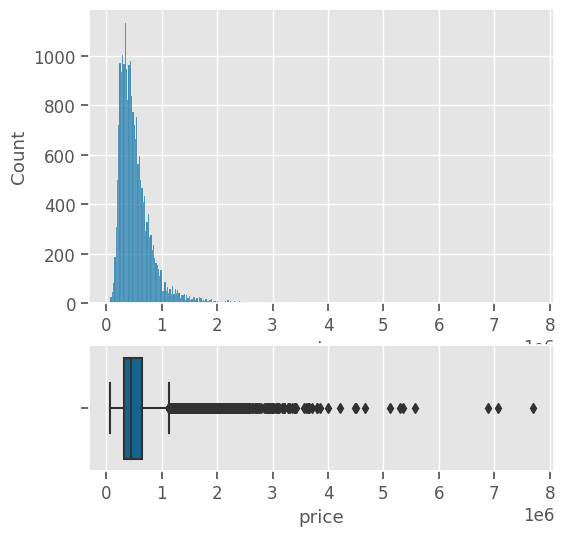

In [12]:
grid_spec = {'height_ratios':[0.7,0.3]}
fig, axes = plt.subplots(nrows=2, figsize=(6,6), gridspec_kw=grid_spec)

sns.histplot(data=df_ml, x='price',ax=axes[0])
sns.boxplot(data=df_ml, x='price',ax=axes[1])

In [13]:
import scipy.stats as stats
idx_outliers = np.abs(stats.zscore(df_ml['price']) )>3
idx_outliers.sum()

406

In [14]:
df_ml[~idx_outliers]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   
...              ...       ...        ...          ...       ...     ...   
263000018   360000.0         3       2.50         1530      1131     3.0   
6600060120  400000.0         4       2.50         2310      5813     2.0   
1523300141  402101.0         2       0.75         1020      1350     2.0   
291310100   400000.0         3       2.50         1600      2388     2.0   
1523300157  325000.0         2       0.75         1020      1076     2.0   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520           0     0          3      7        1180              0   
6414100192           0     0          3      7        2170            400   
5631500400           0     0          3      6         770              0   
2487200875           0     0          5      7        1050            910   
1954400510           0     0          3      8        1680              0   
...                ...   ...        ...    ...         ...            ...   
263000018            0     0          3      8        1530              0   
6600060120           0     0          3      8        2310              0   
1523300141           0     0          3      7        1020              0   
291310100            0     0          3      8        1600              0   
1523300157           0     0          3      7        1020              0   

            yr_built  yr_renovated zipcode      lat     long  sqft_living15  \
id                                                                            
7129300520      1955             0   98178  47.5112 -122.257           1340   
6414100192      1951          1991   98125  47.7210 -122.319           1690   
5631500400      1933             0   98028  47.7379 -122.233           2720   
2487200875      1965             0   98136  47.5208 -122.393           1360   
1954400510      1987             0   98074  47.6168 -122.045           1800   
...              ...           ...     ...      ...      ...            ...   
263000018       2009             0   98103  47.6993 -122.346           1530   
6600060120      2014             0   98146  47.5107 -122.362           1830   
1523300141      2009             0   98144  47.5944 -122.299           1020   
291310100       2004             0   98027  47.5345 -122.069           1410   
1523300157      2008             0   98144  47.5941 -122.299           1020   

            sqft_lot15  
id                      
7129300520        5650  
6414100192        7639  
5631500400        8062  
2487200875        5000  
1954400510        7503  
...                ...  
263000018         1509  
6600060120        7200  
1523300141        2007  
291310100         1287  
1523300157        1357  

[21207 rows x 19 columns]

In [15]:
df_ml = df_ml[~idx_outliers].copy()
df_ml

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   
...              ...       ...        ...          ...       ...     ...   
263000018   360000.0         3       2.50         1530      1131     3.0   
6600060120  400000.0         4       2.50         2310      5813     2.0   
1523300141  402101.0         2       0.75         1020      1350     2.0   
291310100   400000.0         3       2.50         1600      2388     2.0   
1523300157  325000.0         2       0.75         1020      1076     2.0   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520           0     0          3      7        1180              0   
6414100192           0     0          3      7        2170            400   
5631500400           0     0          3      6         770              0   
2487200875           0     0          5      7        1050            910   
1954400510           0     0          3      8        1680              0   
...                ...   ...        ...    ...         ...            ...   
263000018            0     0          3      8        1530              0   
6600060120           0     0          3      8        2310              0   
1523300141           0     0          3      7        1020              0   
291310100            0     0          3      8        1600              0   
1523300157           0     0          3      7        1020              0   

            yr_built  yr_renovated zipcode      lat     long  sqft_living15  \
id                                                                            
7129300520      1955             0   98178  47.5112 -122.257           1340   
6414100192      1951          1991   98125  47.7210 -122.319           1690   
5631500400      1933             0   98028  47.7379 -122.233           2720   
2487200875      1965             0   98136  47.5208 -122.393           1360   
1954400510      1987             0   98074  47.6168 -122.045           1800   
...              ...           ...     ...      ...      ...            ...   
263000018       2009             0   98103  47.6993 -122.346           1530   
6600060120      2014             0   98146  47.5107 -122.362           1830   
1523300141      2009             0   98144  47.5944 -122.299           1020   
291310100       2004             0   98027  47.5345 -122.069           1410   
1523300157      2008             0   98144  47.5941 -122.299           1020   

            sqft_lot15  
id                      
7129300520        5650  
6414100192        7639  
5631500400        8062  
2487200875        5000  
1954400510        7503  
...                ...  
263000018         1509  
6600060120        7200  
1523300141        2007  
291310100         1287  
1523300157        1357  

[21207 rows x 19 columns]

<AxesSubplot:xlabel='price'>

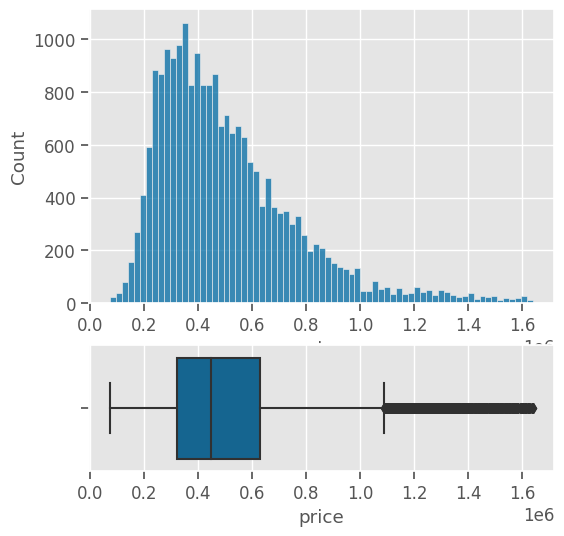

In [16]:
grid_spec = {'height_ratios':[0.7,0.3]}
fig, axes = plt.subplots(nrows=2, figsize=(6,6),gridspec_kw=grid_spec)

sns.histplot(data=df_ml, x='price',ax=axes[0])
sns.boxplot(data=df_ml, x='price',ax=axes[1])

In [17]:

df_ml['bedrooms'].describe()

count    21207.000000
mean         3.353704
std          0.921360
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [18]:
df_ml = df_ml[df_ml['bedrooms'] <33]
df_ml.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.120600e+04  21206.000000  21206.000000  21206.000000  2.120600e+04   
mean   5.068389e+05      3.352306      2.086461   2032.111431  1.483506e+04   
std    2.593303e+05      0.898607      0.737274    837.168695  4.041091e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.200000e+05      3.000000      1.500000   1410.000000  5.005000e+03   
50%    4.469750e+05      3.000000      2.250000   1890.000000  7.560000e+03   
75%    6.271875e+05      4.000000      2.500000   2500.000000  1.049200e+04   
max    1.640000e+06     11.000000      7.500000   7480.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21206.000000  21206.000000  21206.000000  21206.000000  21206.000000   
mean       1.487103      0.004338      0.205649      3.407573      7.604310   
std        0.538616      0.065725      0.707962      0.649028      1.111361   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.000000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     12.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated           lat  \
count  21206.000000   21206.000000  21206.000000  21206.000000  21206.000000   
mean    1751.350373     280.761058   1970.933274     80.087004     47.558943   
std      772.603907     425.364903     29.283709    391.703387      0.139467   
min      290.000000       0.000000   1900.000000      0.000000     47.155900   
25%     1180.000000       0.000000   1951.250000      0.000000     47.467000   
50%     1540.000000       0.000000   1975.000000      0.000000     47.569850   
75%     2170.000000     540.000000   1996.000000      0.000000     47.678700   
max     7320.000000    2850.000000   2015.000000   2015.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21206.000000   21206.000000   21206.000000  
mean    -122.213639    1960.369046   12642.557484  
std        0.141540     655.344766   27224.850064  
min     -122.519000     399.000000     651.000000  
25%     -122.329000    1480.000000    5080.000000  
50%     -122.231000    1820.000000    7577.000000  
75%     -122.124000    2330.000000   10000.000000  
max     -121.315000    5790.000000  871200.000000

In [19]:
df_ml[df_ml['bathrooms'] >6]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                          
9175600025   800000.0         7       6.75         7480     41664     2.0   
424049043    450000.0         9       7.50         4050      6504     2.0   
424069279   1180000.0         6       6.50         6260     10955     2.0   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
9175600025           0     2          3     11        5080           2400   
424049043            0     0          3      7        4050              0   
424069279            0     0          3     11        4840           1420   

            yr_built  yr_renovated zipcode      lat     long  sqft_living15  \
id                                                                            
9175600025      1953             0   98166  47.4643 -122.368           2810   
424049043       1996             0   98144  47.5923 -122.301           1448   
424069279       2007             0   98075  47.5947 -122.039           2710   

            sqft_lot15  
id                      
9175600025       33190  
424049043         3866  
424069279        12550

## Preprocessing with Scikit-Learn 1.1+

In [20]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.9.15
sklearn version: 1.1.3


### Preprocessing + ColumnTransformer


In [21]:
## Make x and y variables
target = 'price'
drop_cols_model = []

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
id                                                                           
2895600090         3       1.00         1120      7320     1.0           0   
8563000110         4       1.75         1460      9750     1.0           0   
2591800340         3       2.25         1820      7420     2.0           0   
7215721330         3       2.50         1650      4218     2.0           0   
7502800030         4       2.75         3550      9400     2.0           0   

            view  condition  grade  sqft_above  sqft_basement  yr_built  \
id                                                                        
2895600090     0          4      7        1120              0      1954   
8563000110     0          4      7        1460              0      1967   
2591800340     0          4      8        1820              0      1983   
7215721330     0          3      8        1650              0      2000   
7502800030     0          3      9        3550              0      2014   

            yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  
id                                                                             
2895600090             0   98146  47.5103 -122.382           1410        6328  
8563000110             0   98008  47.6205 -122.102           1820        9840  
2591800340             0   98058  47.4368 -122.162           1900        7526  
7215721330             0   98075  47.5998 -122.016           1650        4559  
7502800030             0   98059  47.4827 -122.131           3550        9421

In [22]:
## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore',
                                       sparse=False) )
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [23]:
## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline( SimpleImputer(strategy='mean'), 
#                          StandardScaler() 
                        )
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

>- Note: So far, all of the code should be familiar to you. 
    -  With sklearn v1.1+, you should always add `verbose_feature_names_out=False` to column transformers *`ColumnTransformer`/ `make_column_transformer`)
        - (If you want to see what the verbose version looks like feel free to give it a try!)

In [24]:
## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x169988c40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x169992820>)],
                  verbose_feature_names_out=False)

In [25]:
## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98

In [26]:
### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.fit_transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
id                                                                           
2895600090       3.0       1.00       1120.0    7320.0     1.0         0.0   
8563000110       4.0       1.75       1460.0    9750.0     1.0         0.0   
2591800340       3.0       2.25       1820.0    7420.0     2.0         0.0   
7215721330       3.0       2.50       1650.0    4218.0     2.0         0.0   
7502800030       4.0       2.75       3550.0    9400.0     2.0         0.0   
...              ...        ...          ...       ...     ...         ...   
3211200140       4.0       2.00       1720.0    7210.0     1.0         0.0   
6381502155       3.0       1.00       1490.0    7200.0     1.0         0.0   
8964800695       3.0       1.75       2230.0   13529.0     1.0         0.0   
2320069206       3.0       1.00       1250.0    8276.0     1.5         0.0   
624100010        3.0       2.50       2930.0   19900.0     1.5         0.0   

            view  condition  grade  sqft_above  sqft_basement  yr_built  \
id                                                                        
2895600090   0.0        4.0    7.0      1120.0            0.0    1954.0   
8563000110   0.0        4.0    7.0      1460.0            0.0    1967.0   
2591800340   0.0        4.0    8.0      1820.0            0.0    1983.0   
7215721330   0.0        3.0    8.0      1650.0            0.0    2000.0   
7502800030   0.0        3.0    9.0      3550.0            0.0    2014.0   
...          ...        ...    ...         ...            ...       ...   
3211200140   0.0        3.0    7.0       860.0          860.0    1971.0   
6381502155   0.0        3.0    7.0      1490.0            0.0    1954.0   
8964800695   0.0        3.0    9.0      2230.0            0.0    1949.0   
2320069206   0.0        5.0    6.0      1250.0            0.0    1939.0   
624100010    0.0        3.0    9.0      2930.0            0.0    1983.0   

            yr_renovated      lat     long  sqft_living15  sqft_lot15  \
id                                                                      
2895600090           0.0  47.5103 -122.382         1410.0      6328.0   
8563000110           0.0  47.6205 -122.102         1820.0      9840.0   
2591800340           0.0  47.4368 -122.162         1900.0      7526.0   
7215721330           0.0  47.5998 -122.016         1650.0      4559.0   
7502800030           0.0  47.4827 -122.131         3550.0      9421.0   
...                  ...      ...      ...            ...         ...   
3211200140           0.0  47.7307 -122.239         1250.0      7210.0   
6381502155           0.0  47.7276 -122.307         1280.0      7200.0   
8964800695           0.0  47.6204 -122.217         2230.0     11900.0   
2320069206           0.0  47.2092 -121.997         1250.0      8792.0   
624100010            0.0  47.7234 -122.066         3160.0     20492.0   

            zipcode_98001  zipcode_98002  zipcode_98003  zipcode_98004  \
id                                                                       
2895600090            0.0            0.0            0.0            0.0   
8563000110            0.0            0.0            0.0            0.0   
2591800340            0.0            0.0            0.0            0.0   
7215721330            0.0            0.0            0.0            0.0   
7502800030            0.0            0.0            0.0            0.0   
...                   ...            ...            ...            ...   
3211200140            0.0            0.0            0.0            0.0   
6381502155            0.0            0.0            0.0            0.0   
8964800695            0.0            0.0            0.0            1.0   
2320069206            0.0            0.0            0.0            0.0   
624100010             0.0            0.0            0.0            0.0   

            zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
id                                

In [27]:
## Customization Options
pd.set_option("display.max_columns",100)
X_train_df

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
id                                                                           
2895600090       3.0       1.00       1120.0    7320.0     1.0         0.0   
8563000110       4.0       1.75       1460.0    9750.0     1.0         0.0   
2591800340       3.0       2.25       1820.0    7420.0     2.0         0.0   
7215721330       3.0       2.50       1650.0    4218.0     2.0         0.0   
7502800030       4.0       2.75       3550.0    9400.0     2.0         0.0   
...              ...        ...          ...       ...     ...         ...   
3211200140       4.0       2.00       1720.0    7210.0     1.0         0.0   
6381502155       3.0       1.00       1490.0    7200.0     1.0         0.0   
8964800695       3.0       1.75       2230.0   13529.0     1.0         0.0   
2320069206       3.0       1.00       1250.0    8276.0     1.5         0.0   
624100010        3.0       2.50       2930.0   19900.0     1.5         0.0   

            view  condition  grade  sqft_above  sqft_basement  yr_built  \
id                                                                        
2895600090   0.0        4.0    7.0      1120.0            0.0    1954.0   
8563000110   0.0        4.0    7.0      1460.0            0.0    1967.0   
2591800340   0.0        4.0    8.0      1820.0            0.0    1983.0   
7215721330   0.0        3.0    8.0      1650.0            0.0    2000.0   
7502800030   0.0        3.0    9.0      3550.0            0.0    2014.0   
...          ...        ...    ...         ...            ...       ...   
3211200140   0.0        3.0    7.0       860.0          860.0    1971.0   
6381502155   0.0        3.0    7.0      1490.0            0.0    1954.0   
8964800695   0.0        3.0    9.0      2230.0            0.0    1949.0   
2320069206   0.0        5.0    6.0      1250.0            0.0    1939.0   
624100010    0.0        3.0    9.0      2930.0            0.0    1983.0   

            yr_renovated      lat     long  sqft_living15  sqft_lot15  \
id                                                                      
2895600090           0.0  47.5103 -122.382         1410.0      6328.0   
8563000110           0.0  47.6205 -122.102         1820.0      9840.0   
2591800340           0.0  47.4368 -122.162         1900.0      7526.0   
7215721330           0.0  47.5998 -122.016         1650.0      4559.0   
7502800030           0.0  47.4827 -122.131         3550.0      9421.0   
...                  ...      ...      ...            ...         ...   
3211200140           0.0  47.7307 -122.239         1250.0      7210.0   
6381502155           0.0  47.7276 -122.307         1280.0      7200.0   
8964800695           0.0  47.6204 -122.217         2230.0     11900.0   
2320069206           0.0  47.2092 -121.997         1250.0      8792.0   
624100010            0.0  47.7234 -122.066         3160.0     20492.0   

            zipcode_98001  zipcode_98002  zipcode_98003  zipcode_98004  \
id                                                                       
2895600090            0.0            0.0            0.0            0.0   
8563000110            0.0            0.0            0.0            0.0   
2591800340            0.0            0.0            0.0            0.0   
7215721330            0.0            0.0            0.0            0.0   
7502800030            0.0            0.0            0.0            0.0   
...                   ...            ...            ...            ...   
3211200140            0.0            0.0            0.0            0.0   
6381502155            0.0            0.0            0.0            0.0   
8964800695            0.0            0.0            0.0            1.0   
2320069206            0.0            0.0            0.0            0.0   
624100010             0.0            0.0            0.0            0.0   

            zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
id                                

In [28]:
# def evaluate_regression(model, X_train,y_train, X_test, y_test): 
#     """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
#     ## Training Data
#     y_pred_train = model.predict(X_train)
#     r2_train = metrics.r2_score(y_train, y_pred_train)
#     rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
#                                             squared=False)
#     mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    
#     print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        
    
#     ## Test Data
#     y_pred_test = model.predict(X_test)
#     r2_test = metrics.r2_score(y_test, y_pred_test)
#     rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
#                                             squared=False)
#     mae_test = metrics.mean_absolute_error(y_test, y_pred_test)

#     print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")


In [29]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
#         print(f"Train R^2 = {r2_train:,.2f}")#"\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
#         print(f"Test R^2 = {r2_test:,.2f}")#"\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")
#         print()
#         print(f"Train RMSE = {rmse_train:,.2f}")
#         print(f"Test RMSE = {rmse_test:,.2f}")
#         print()
#         print(f"Train MAE = {mae_train:,.2f}")
#         print(f"Test MAE = {mae_test:,.2f}")
        
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")


### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, 
                    X_test_df, y_test)

In [31]:
reg.coef_

array([-1.05021635e+04,  1.57225436e+04,  6.05474449e+11,  2.90551195e-01,
       -2.03263182e+04,  2.40838160e+05,  4.42817465e+04,  2.54186537e+04,
        5.30051666e+04, -6.05474449e+11, -6.05474449e+11, -5.46154672e+02,
        2.10943812e+01,  1.62619102e+05, -4.59670967e+04,  3.38181316e+01,
       -5.35951855e-02, -2.48142986e+08, -2.48129014e+08, -2.48161177e+08,
       -2.47579267e+08, -2.47880239e+08, -2.47906240e+08, -2.47935502e+08,
       -2.47949994e+08, -2.48049619e+08, -2.48086336e+08, -2.48087746e+08,
       -2.48104240e+08, -2.48129323e+08, -2.48174986e+08, -2.48017890e+08,
       -2.47984243e+08, -2.48087654e+08, -2.47957632e+08, -2.48145585e+08,
       -2.48146887e+08, -2.48159059e+08, -2.47848135e+08, -2.48019018e+08,
       -2.48108259e+08, -2.47409806e+08, -2.47710492e+08, -2.48142172e+08,
       -2.48042805e+08, -2.47950771e+08, -2.47969923e+08, -2.48120897e+08,
       -2.48073963e+08, -2.48130770e+08, -2.48068622e+08, -2.48053920e+08,
       -2.48071876e+08, -

In [32]:
reg.intercept_

235443775.57893348

In [33]:
## Saving the coefficients
coeffs = pd.Series(reg.coef_, index= feature_names)
coeffs.loc['Intercept'] = reg.intercept_
coeffs

bedrooms        -1.050216e+04
bathrooms        1.572254e+04
sqft_living      6.054744e+11
sqft_lot         2.905512e-01
floors          -2.032632e+04
                     ...     
zipcode_98178   -2.481279e+08
zipcode_98188   -2.481326e+08
zipcode_98198   -2.481429e+08
zipcode_98199   -2.478342e+08
Intercept        2.354438e+08
Length: 88, dtype: float64

In [34]:
## formatting numbers to not use , thousands sep, and 4 digits floats
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
pd.set_option('display.max_rows', 100)

In [35]:
coeffs

bedrooms                 -10,502.1635
bathrooms                 15,722.5436
sqft_living      605,474,448,954.2510
sqft_lot                       0.2906
floors                   -20,326.3182
waterfront               240,838.1601
view                      44,281.7465
condition                 25,418.6537
grade                     53,005.1666
sqft_above      -605,474,448,822.4048
sqft_basement   -605,474,448,872.8506
yr_built                    -546.1547
yr_renovated                  21.0944
lat                      162,619.1022
long                     -45,967.0967
sqft_living15                 33.8181
sqft_lot15                    -0.0536
zipcode_98001       -248,142,986.0302
zipcode_98002       -248,129,014.1788
zipcode_98003       -248,161,177.0118
zipcode_98004       -247,579,266.7485
zipcode_98005       -247,880,239.3415
zipcode_98006       -247,906,240.4852
zipcode_98007       -247,935,501.8269
zipcode_98008       -247,949,993.7232
zipcode_98010       -248,049,618.7252
zipcode_9801

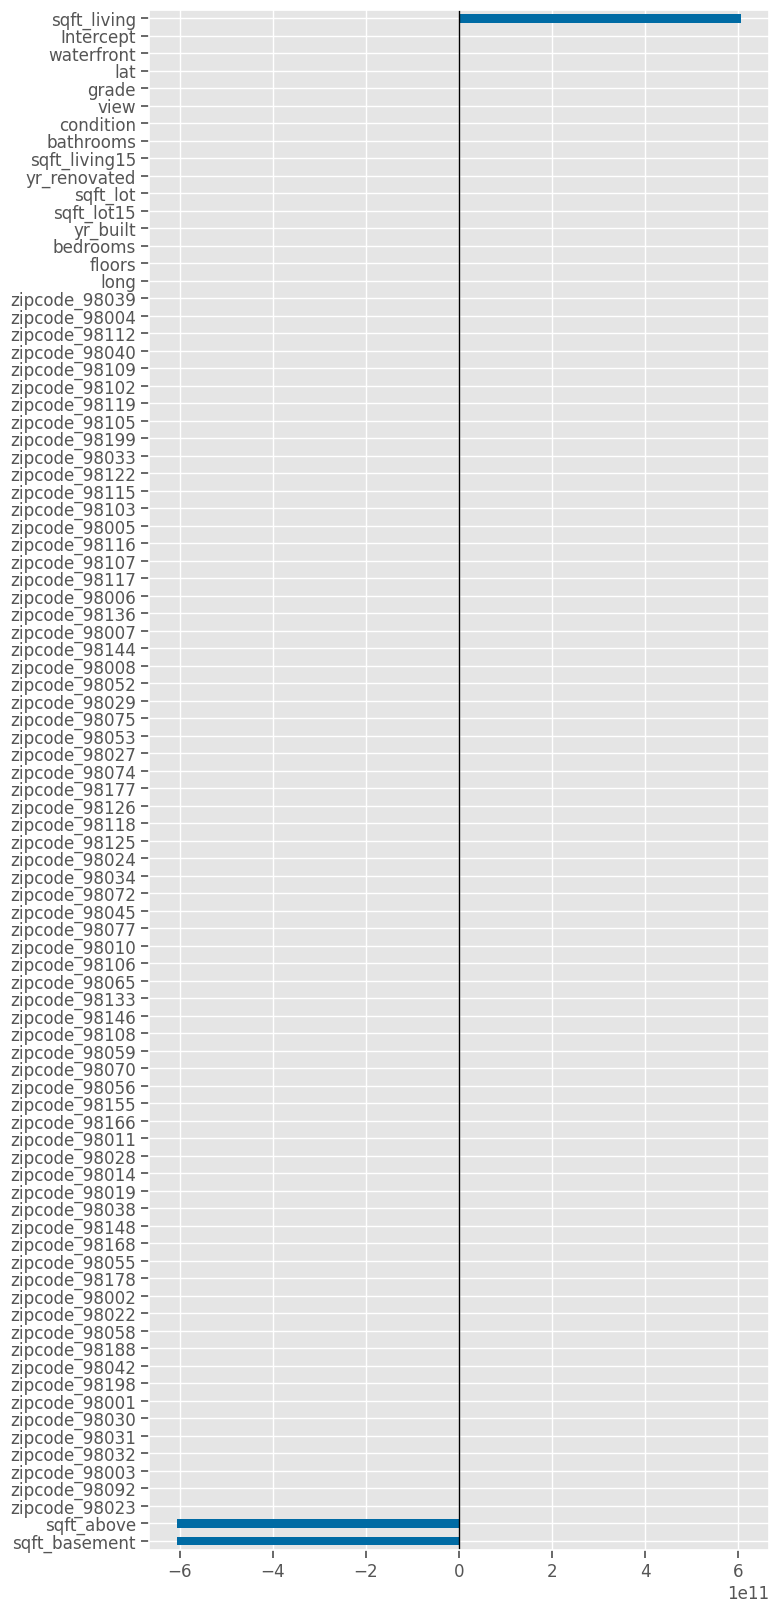

In [36]:
# with sns.plotting_context('notebook'):
ax = coeffs.sort_values().plot(kind='barh',figsize=(8,20))
ax.axvline(0,color='k', lw=1)

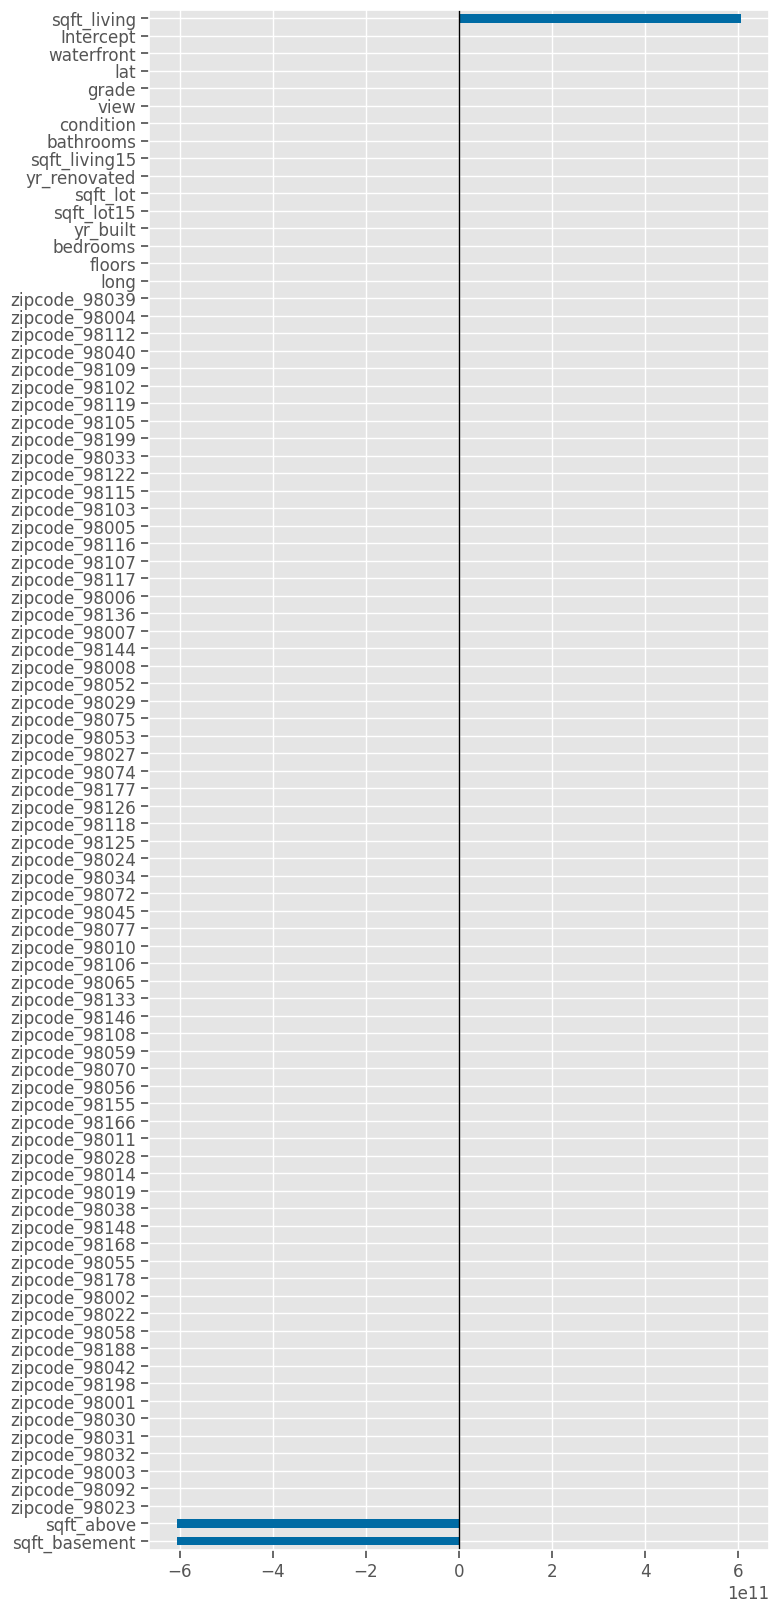

In [37]:
ax = coeffs.sort_values().plot(kind='barh',figsize=(8,20))
ax.axvline(0,color='k', lw=1)

In [38]:
coeffs

bedrooms                 -10,502.1635
bathrooms                 15,722.5436
sqft_living      605,474,448,954.2510
sqft_lot                       0.2906
floors                   -20,326.3182
waterfront               240,838.1601
view                      44,281.7465
condition                 25,418.6537
grade                     53,005.1666
sqft_above      -605,474,448,822.4048
sqft_basement   -605,474,448,872.8506
yr_built                    -546.1547
yr_renovated                  21.0944
lat                      162,619.1022
long                     -45,967.0967
sqft_living15                 33.8181
sqft_lot15                    -0.0536
zipcode_98001       -248,142,986.0302
zipcode_98002       -248,129,014.1788
zipcode_98003       -248,161,177.0118
zipcode_98004       -247,579,266.7485
zipcode_98005       -247,880,239.3415
zipcode_98006       -247,906,240.4852
zipcode_98007       -247,935,501.8269
zipcode_98008       -247,949,993.7232
zipcode_98010       -248,049,618.7252
zipcode_9801

### Multicollinearity & One Hot Encoding

In [39]:
pd.options.display.max_rows

100

In [40]:
df_ml.select_dtypes('object').nunique()

zipcode    70
dtype: int64

## UPDATE THIS
- Here is where we should consider our final use case for this data. If we want to explain student performance, there is no benefit to one-hot-encoding both categories.
- We know that if someone has a 0 for "paid_yes," that it means "paid_no" would be 1.
- To remove these unnecessary columns, we can change our arguments for our OneHotEncoder in our pipeline and add "drop='if_binary'" or "drop='first'/'last' to automatically drop one of the categories to reduce multicollinearity.
- HOWEVER, we cannot use BOTH handle_unknown AND the drop argument together. We will get an error message.
Since our current modeling will be used to extract insights for our stakeholders and will not be deployed to the cloud where it will run predictions on new data, we can safely switch to using the drop='if_binary' option.

In [41]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode','lat','long']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=15
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='mean'), 
#                          StandardScaler() 
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

bedrooms  bathrooms  sqft_living    sqft_lot  floors  waterfront  \
id                                                                             
2895600090    3.0000     1.0000   1,120.0000  7,320.0000  1.0000      0.0000   
8563000110    4.0000     1.7500   1,460.0000  9,750.0000  1.0000      0.0000   
2591800340    3.0000     2.2500   1,820.0000  7,420.0000  2.0000      0.0000   
7215721330    3.0000     2.5000   1,650.0000  4,218.0000  2.0000      0.0000   
7502800030    4.0000     2.7500   3,550.0000  9,400.0000  2.0000      0.0000   
...              ...        ...          ...         ...     ...         ...   
3211200140    4.0000     2.0000   1,720.0000  7,210.0000  1.0000      0.0000   
6381502155    3.0000     1.0000   1,490.0000  7,200.0000  1.0000      0.0000   
8964800695    3.0000     1.7500   2,230.0000 13,529.0000  1.0000      0.0000   
2320069206    3.0000     1.0000   1,250.0000  8,276.0000  1.5000      0.0000   
624100010     3.0000     2.5000   2,930.0000 19,900.0000  1.5000      0.0000   

             view  condition  grade  sqft_above  sqft_basement   yr_built  \
id                                                                          
2895600090 0.0000     4.0000 7.0000  1,120.0000         0.0000 1,954.0000   
8563000110 0.0000     4.0000 7.0000  1,460.0000         0.0000 1,967.0000   
2591800340 0.0000     4.0000 8.0000  1,820.0000         0.0000 1,983.0000   
7215721330 0.0000     3.0000 8.0000  1,650.0000         0.0000 2,000.0000   
7502800030 0.0000     3.0000 9.0000  3,550.0000         0.0000 2,014.0000   
...           ...        ...    ...         ...            ...        ...   
3211200140 0.0000     3.0000 7.0000    860.0000       860.0000 1,971.0000   
6381502155 0.0000     3.0000 7.0000  1,490.0000         0.0000 1,954.0000   
8964800695 0.0000     3.0000 9.0000  2,230.0000         0.0000 1,949.0000   
2320069206 0.0000     5.0000 6.0000  1,250.0000         0.0000 1,939.0000   
624100010  0.0000     3.0000 9.0000  2,930.0000         0.0000 1,983.0000   

            yr_renovated  sqft_living15  sqft_lot15  
id                                                   
2895600090        0.0000     1,410.0000  6,328.0000  
8563000110        0.0000     1,820.0000  9,840.0000  
2591800340        0.0000     1,900.0000  7,526.0000  
7215721330        0.0000     1,650.0000  4,559.0000  
7502800030        0.0000     3,550.0000  9,421.0000  
...                  ...            ...         ...  
3211200140        0.0000     1,250.0000  7,210.0000  
6381502155        0.0000     1,280.0000  7,200.0000  
8964800695        0.0000     2,230.0000 11,900.0000  
2320069206        0.0000     1,250.0000  8,792.0000  
624100010         0.0000     3,160.0000 20,492.0000  

[15904 rows x 15 columns]

In [42]:
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

In [43]:
## Saving the coefficients
coeffs = pd.Series(reg.coef_, index= feature_names)
coeffs.loc['Intercept'] = reg.intercept_
coeffs

bedrooms          -20,706.5344
bathrooms          30,075.4922
sqft_living            60.3081
sqft_lot                0.1253
floors             55,449.2494
waterfront        150,011.3959
view               33,485.5553
condition          19,587.6197
grade             108,423.2786
sqft_above             12.1330
sqft_basement          48.1751
yr_built           -3,013.2481
yr_renovated           12.5567
sqft_living15          56.0368
sqft_lot15             -0.3645
Intercept       5,206,158.1896
dtype: float64

In [44]:
def get_coeffs(reg):
    """Save the coefficients and intercept from a linear regression model
    as a Pandas Series"""
    ## Saving the coefficients
    coeffs = pd.Series(reg.coef_, index= reg.feature_names_in_)
    coeffs.loc['Intercept'] = reg.intercept_
    return coeffs

In [45]:
def plot_coeffs(coeffs, figsize=(6,5), intercept=True,
                intercept_name="Intercept", sort_values=True,
                ascending=True, ax=None, title='Regression Coefficients'):
    
    ## Make function get coeffs if coeffs in not series
    if isinstance(coeffs, pd.Series) == False:
        coeffs = get_coeffs(coeffs)
        
    if (intercept==False):
        if intercept_name in coeffs:
            coeffs_plot = coeffs.drop(intercept_name).copy()
        else: 
            raise Exception(f"{intercept_name} not found.")
    else:
        coeffs_plot=coeffs.copy()
    
    if sort_values:
        coeffs_plot = coeffs_plot.sort_values(ascending=ascending)
        
    if ax is None:
        
        ax = coeffs_plot.plot(kind='barh',figsize=figsize)
    else:
        coeffs_plot.plot(kind='barh',ax=ax)
        
    ax.axvline(0,color='k', lw=1)
    ax.set(ylabel='Feature Name',xlabel='Coefficient',title=title)
#     plt.tight_layout()
    return ax

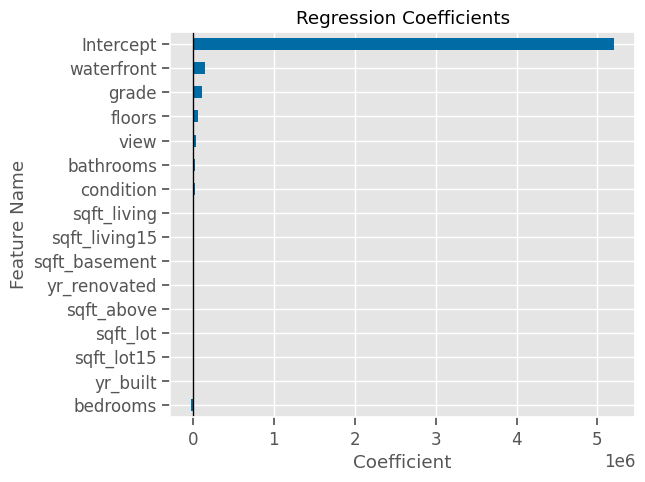

In [46]:
ax = plot_coeffs(reg)

### Tick Formatting

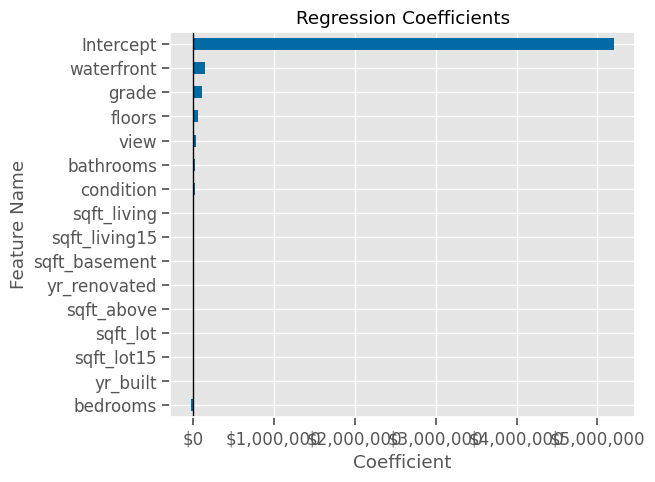

In [47]:
from matplotlib import ticker

ax = plot_coeffs(coeffs)

price_fmt = ticker.StrMethodFormatter("${x:,.0f}")
ax.xaxis.set_major_formatter(price_fmt)

In [48]:
## Make a "hundred_thousands" function 
def hundred_thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-3:,.0f}k"

price_fmt_thous = ticker.FuncFormatter(hundred_thousands)

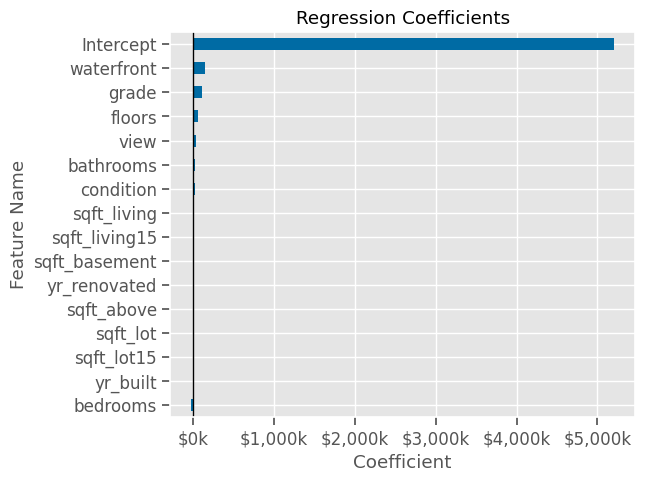

In [49]:
ax = plot_coeffs(coeffs)
ax.xaxis.set_major_formatter(price_fmt_thous)

## Effect of Scaling on Coefficients

In [50]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode','lat','long','view']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
                         StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
id                                                                           
2895600090   -0.3858    -1.4718      -1.0873   -0.1810 -0.9053     -0.0626   
8563000110    0.7217    -0.4557      -0.6796   -0.1207 -0.9053     -0.0626   
2591800340   -0.3858     0.2218      -0.2480   -0.1785  0.9468     -0.0626   
7215721330   -0.3858     0.5605      -0.4518   -0.2579  0.9468     -0.0626   
7502800030    0.7217     0.8992       1.8262   -0.1294  0.9468     -0.0626   
...              ...        ...          ...       ...     ...         ...   
3211200140    0.7217    -0.1169      -0.3679   -0.1837 -0.9053     -0.0626   
6381502155   -0.3858    -1.4718      -0.6436   -0.1840 -0.9053     -0.0626   
8964800695   -0.3858    -0.4557       0.2436   -0.0269 -0.9053     -0.0626   
2320069206   -0.3858    -1.4718      -0.9314   -0.1573  0.0208     -0.0626   
624100010    -0.3858     0.5605       1.0829    0.1311  0.0208     -0.0626   

            condition   grade  sqft_above  sqft_basement  yr_built  \
id                                                                   
2895600090     0.9108 -0.5435     -0.8153        -0.6583   -0.5816   
8563000110     0.9108 -0.5435     -0.3744        -0.6583   -0.1372   
2591800340     0.9108  0.3601      0.0925        -0.6583    0.4097   
7215721330    -0.6303  0.3601     -0.1280        -0.6583    0.9908   
7502800030    -0.6303  1.2638      2.3360        -0.6583    1.4693   
...               ...     ...         ...            ...       ...   
3211200140    -0.6303 -0.5435     -1.1525         1.3771   -0.0005   
6381502155    -0.6303 -0.5435     -0.3355        -0.6583   -0.5816   
8964800695    -0.6303  1.2638      0.6242        -0.6583   -0.7525   
2320069206     2.4519 -1.4472     -0.6467        -0.6583   -1.0943   
624100010     -0.6303  1.2638      1.5320        -0.6583    0.4097   

            yr_renovated  sqft_living15  sqft_lot15  
id                                                   
2895600090       -0.2049        -0.8386     -0.2285  
8563000110       -0.2049        -0.2078     -0.0970  
2591800340       -0.2049        -0.0847     -0.1837  
7215721330       -0.2049        -0.4693     -0.2948  
7502800030       -0.2049         2.4540     -0.1127  
...                  ...            ...         ...  
3211200140       -0.2049        -1.0848     -0.1955  
6381502155       -0.2049        -1.0386     -0.1959  
8964800695       -0.2049         0.4230     -0.0198  
2320069206       -0.2049        -1.0848     -0.1362  
624100010        -0.2049         1.8539      0.3021  

[15904 rows x 14 columns]

In [51]:
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

<AxesSubplot:title={'center':'Regression Coefficients'}, xlabel='Coefficient', ylabel='Feature Name'>

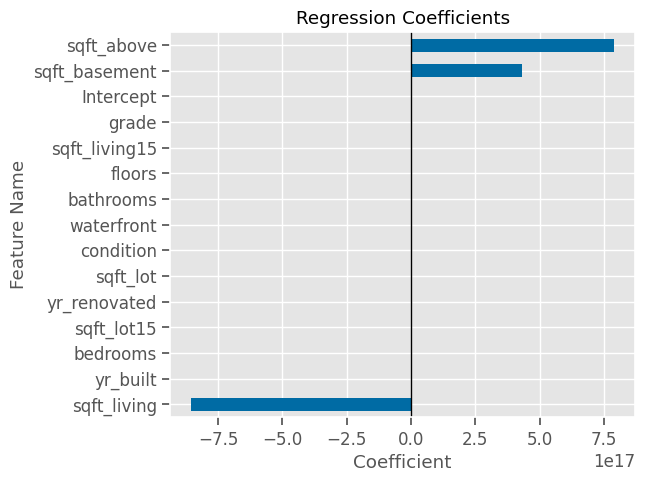

In [52]:
plot_coeffs(reg)

In [53]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode']#,'Month','lat','long','Year','view']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
#                          StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

bedrooms  bathrooms  sqft_living    sqft_lot  floors  waterfront  \
id                                                                             
2895600090    3.0000     1.0000   1,120.0000  7,320.0000  1.0000      0.0000   
8563000110    4.0000     1.7500   1,460.0000  9,750.0000  1.0000      0.0000   
2591800340    3.0000     2.2500   1,820.0000  7,420.0000  2.0000      0.0000   
7215721330    3.0000     2.5000   1,650.0000  4,218.0000  2.0000      0.0000   
7502800030    4.0000     2.7500   3,550.0000  9,400.0000  2.0000      0.0000   
...              ...        ...          ...         ...     ...         ...   
3211200140    4.0000     2.0000   1,720.0000  7,210.0000  1.0000      0.0000   
6381502155    3.0000     1.0000   1,490.0000  7,200.0000  1.0000      0.0000   
8964800695    3.0000     1.7500   2,230.0000 13,529.0000  1.0000      0.0000   
2320069206    3.0000     1.0000   1,250.0000  8,276.0000  1.5000      0.0000   
624100010     3.0000     2.5000   2,930.0000 19,900.0000  1.5000      0.0000   

             view  condition  grade  sqft_above  sqft_basement   yr_built  \
id                                                                          
2895600090 0.0000     4.0000 7.0000  1,120.0000         0.0000 1,954.0000   
8563000110 0.0000     4.0000 7.0000  1,460.0000         0.0000 1,967.0000   
2591800340 0.0000     4.0000 8.0000  1,820.0000         0.0000 1,983.0000   
7215721330 0.0000     3.0000 8.0000  1,650.0000         0.0000 2,000.0000   
7502800030 0.0000     3.0000 9.0000  3,550.0000         0.0000 2,014.0000   
...           ...        ...    ...         ...            ...        ...   
3211200140 0.0000     3.0000 7.0000    860.0000       860.0000 1,971.0000   
6381502155 0.0000     3.0000 7.0000  1,490.0000         0.0000 1,954.0000   
8964800695 0.0000     3.0000 9.0000  2,230.0000         0.0000 1,949.0000   
2320069206 0.0000     5.0000 6.0000  1,250.0000         0.0000 1,939.0000   
624100010  0.0000     3.0000 9.0000  2,930.0000         0.0000 1,983.0000   

            yr_renovated     lat      long  sqft_living15  sqft_lot15  
id                                                                     
2895600090        0.0000 47.5103 -122.3820     1,410.0000  6,328.0000  
8563000110        0.0000 47.6205 -122.1020     1,820.0000  9,840.0000  
2591800340        0.0000 47.4368 -122.1620     1,900.0000  7,526.0000  
7215721330        0.0000 47.5998 -122.0160     1,650.0000  4,559.0000  
7502800030        0.0000 47.4827 -122.1310     3,550.0000  9,421.0000  
...                  ...     ...       ...            ...         ...  
3211200140        0.0000 47.7307 -122.2390     1,250.0000  7,210.0000  
6381502155        0.0000 47.7276 -122.3070     1,280.0000  7,200.0000  
8964800695        0.0000 47.6204 -122.2170     2,230.0000 11,900.0000  
2320069206        0.0000 47.2092 -121.9970     1,250.0000  8,792.0000  
624100010         0.0000 47.7234 -122.0660     3,160.0000 20,492.0000  

[15904 rows x 17 columns]

In [54]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

## Saving the coefficients
coeffs = pd.Series(reg.coef_, index= feature_names)
coeffs.loc['Intercept'] = reg.intercept_
# ax = coeffs.sort_values().plot(kind='barh')#,figsize=(6,4))
# ax.axvline(0,color='k', lw=1)
coeffs

bedrooms        -16,195.4476
bathrooms        29,725.1959
sqft_living          59.5155
sqft_lot              0.1573
floors           43,991.7833
waterfront      188,149.2378
view             43,163.1229
condition        24,777.8254
grade            95,818.7061
sqft_above           20.2234
sqft_basement        39.2921
yr_built         -2,633.1933
yr_renovated         15.8283
lat             487,652.3602
long            152,523.9813
sqft_living15        42.3656
sqft_lot15           -0.3424
Intercept             0.0000
dtype: float64

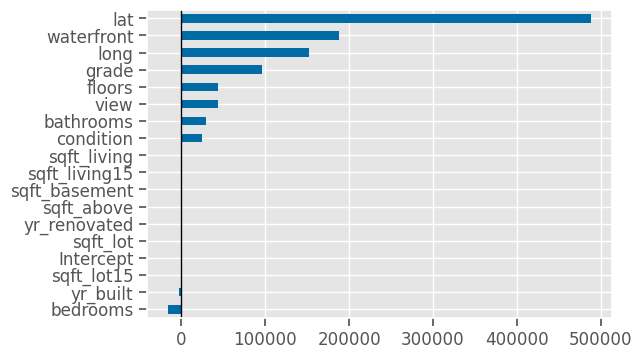

In [55]:
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,4))
ax.axvline(0,color='k', lw=1)

# APPENDIX: FOR SLIDES

In [56]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode','lat','long','view']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
#                          StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

bedrooms  bathrooms  sqft_living    sqft_lot  floors  waterfront  \
id                                                                             
2895600090    3.0000     1.0000   1,120.0000  7,320.0000  1.0000      0.0000   
8563000110    4.0000     1.7500   1,460.0000  9,750.0000  1.0000      0.0000   
2591800340    3.0000     2.2500   1,820.0000  7,420.0000  2.0000      0.0000   
7215721330    3.0000     2.5000   1,650.0000  4,218.0000  2.0000      0.0000   
7502800030    4.0000     2.7500   3,550.0000  9,400.0000  2.0000      0.0000   
...              ...        ...          ...         ...     ...         ...   
3211200140    4.0000     2.0000   1,720.0000  7,210.0000  1.0000      0.0000   
6381502155    3.0000     1.0000   1,490.0000  7,200.0000  1.0000      0.0000   
8964800695    3.0000     1.7500   2,230.0000 13,529.0000  1.0000      0.0000   
2320069206    3.0000     1.0000   1,250.0000  8,276.0000  1.5000      0.0000   
624100010     3.0000     2.5000   2,930.0000 19,900.0000  1.5000      0.0000   

            condition  grade  sqft_above  sqft_basement   yr_built  \
id                                                                   
2895600090     4.0000 7.0000  1,120.0000         0.0000 1,954.0000   
8563000110     4.0000 7.0000  1,460.0000         0.0000 1,967.0000   
2591800340     4.0000 8.0000  1,820.0000         0.0000 1,983.0000   
7215721330     3.0000 8.0000  1,650.0000         0.0000 2,000.0000   
7502800030     3.0000 9.0000  3,550.0000         0.0000 2,014.0000   
...               ...    ...         ...            ...        ...   
3211200140     3.0000 7.0000    860.0000       860.0000 1,971.0000   
6381502155     3.0000 7.0000  1,490.0000         0.0000 1,954.0000   
8964800695     3.0000 9.0000  2,230.0000         0.0000 1,949.0000   
2320069206     5.0000 6.0000  1,250.0000         0.0000 1,939.0000   
624100010      3.0000 9.0000  2,930.0000         0.0000 1,983.0000   

            yr_renovated  sqft_living15  sqft_lot15  
id                                                   
2895600090        0.0000     1,410.0000  6,328.0000  
8563000110        0.0000     1,820.0000  9,840.0000  
2591800340        0.0000     1,900.0000  7,526.0000  
7215721330        0.0000     1,650.0000  4,559.0000  
7502800030        0.0000     3,550.0000  9,421.0000  
...                  ...            ...         ...  
3211200140        0.0000     1,250.0000  7,210.0000  
6381502155        0.0000     1,280.0000  7,200.0000  
8964800695        0.0000     2,230.0000 11,900.0000  
2320069206        0.0000     1,250.0000  8,792.0000  
624100010         0.0000     3,160.0000 20,492.0000  

[15904 rows x 14 columns]

# LIN REG SLIDE IMAGES & MODELS

### Raw

In [57]:
slide_reg_cols = ['bathrooms','bedrooms','sqft_living','yr_built','waterfront',
                 'floors'
                 ]
## Make x and y variables
target = 'price'
# drop_cols_model = ['zipcode','lat','long','view']

y = df_ml[target].copy()
X = df_ml[slide_reg_cols].copy()#.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')


num_pipe_raw = make_pipeline( SimpleImputer(strategy='median'))


## make the preprocessing column transformer
preprocessor_raw = make_column_transformer( (num_pipe_raw, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)


## Get feature names
preprocessor_raw.fit(X_train)
feature_names_raw = preprocessor_raw.get_feature_names_out()




### PREP ALL X VARS
## Prepare X_train_df
X_train_raw = pd.DataFrame( preprocessor_raw.transform(X_train), 
                          columns = feature_names_raw,
                         index = X_train.index)

## Prepare X_test_df
X_test_raw = pd.DataFrame( preprocessor_raw.transform(X_test),
                          columns = feature_names_raw,
                         index=X_test.index)
X_train_raw

bathrooms  bedrooms  sqft_living   yr_built  waterfront  floors
id                                                                         
2895600090     1.0000    3.0000   1,120.0000 1,954.0000      0.0000  1.0000
8563000110     1.7500    4.0000   1,460.0000 1,967.0000      0.0000  1.0000
2591800340     2.2500    3.0000   1,820.0000 1,983.0000      0.0000  2.0000
7215721330     2.5000    3.0000   1,650.0000 2,000.0000      0.0000  2.0000
7502800030     2.7500    4.0000   3,550.0000 2,014.0000      0.0000  2.0000
...               ...       ...          ...        ...         ...     ...
3211200140     2.0000    4.0000   1,720.0000 1,971.0000      0.0000  1.0000
6381502155     1.0000    3.0000   1,490.0000 1,954.0000      0.0000  1.0000
8964800695     1.7500    3.0000   2,230.0000 1,949.0000      0.0000  1.0000
2320069206     1.0000    3.0000   1,250.0000 1,939.0000      0.0000  1.5000
624100010      2.5000    3.0000   2,930.0000 1,983.0000      0.0000  1.5000

[15904 rows x 6 columns]

### SLIDE IMAGES: Individual Regplots

In [58]:
plot_df = pd.concat([X_train_raw, y_train], axis=1)
plot_df

bathrooms  bedrooms  sqft_living   yr_built  waterfront  floors  \
id                                                                            
2895600090     1.0000    3.0000   1,120.0000 1,954.0000      0.0000  1.0000   
8563000110     1.7500    4.0000   1,460.0000 1,967.0000      0.0000  1.0000   
2591800340     2.2500    3.0000   1,820.0000 1,983.0000      0.0000  2.0000   
7215721330     2.5000    3.0000   1,650.0000 2,000.0000      0.0000  2.0000   
7502800030     2.7500    4.0000   3,550.0000 2,014.0000      0.0000  2.0000   
...               ...       ...          ...        ...         ...     ...   
3211200140     2.0000    4.0000   1,720.0000 1,971.0000      0.0000  1.0000   
6381502155     1.0000    3.0000   1,490.0000 1,954.0000      0.0000  1.0000   
8964800695     1.7500    3.0000   2,230.0000 1,949.0000      0.0000  1.0000   
2320069206     1.0000    3.0000   1,250.0000 1,939.0000      0.0000  1.5000   
624100010      2.5000    3.0000   2,930.0000 1,983.0000      0.0000  1.5000   

                    price  
id                         
2895600090   355,200.0000  
8563000110   427,000.0000  
2591800340   390,000.0000  
7215721330   485,000.0000  
7502800030   659,950.0000  
...                   ...  
3211200140   350,000.0000  
6381502155   300,000.0000  
8964800695 1,450,000.0000  
2320069206   219,000.0000  
624100010    645,000.0000  

[15904 rows x 7 columns]

In [59]:

## FROM MY "From linear to logistic regression" mini-lesson (interview)
def plot_feature_vs_target(df,x='sqft_living',y='price',price_format=True, 
                          figsize=(5,4)):
    """Plots a seaborn regplot of x vs y."""
    ax = sns.regplot(data=df,x=x,y=y,
                line_kws=dict(color='k',ls='--',lw=1),
               scatter_kws=dict(s=10,ec='white',lw=1,alpha=0.8)
                    )
    ax.get_figure().set_size_inches(figsize)
    ax.set_title(f'{x} vs {y}')
    
    if price_format:
        ## Formatting Price Axis
        price_fmt = ticker.StrMethodFormatter("${x:,.0f}")
        ax.yaxis.set_major_formatter(price_fmt)
    plt.tight_layout()
    return ax

In [60]:
# X_train_raw.columns

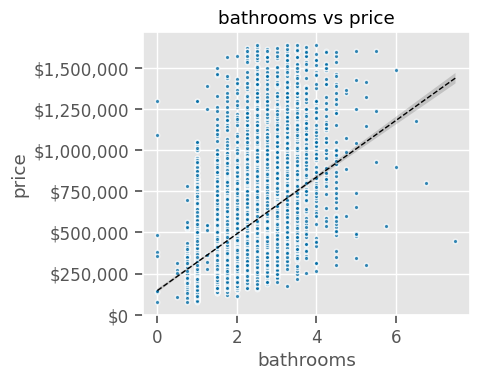

In [61]:
ax=plot_feature_vs_target(plot_df, x='bathrooms',y='price')


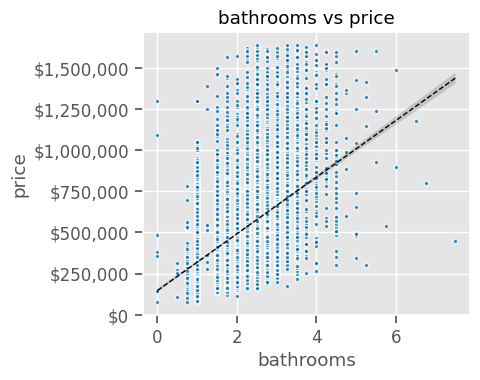

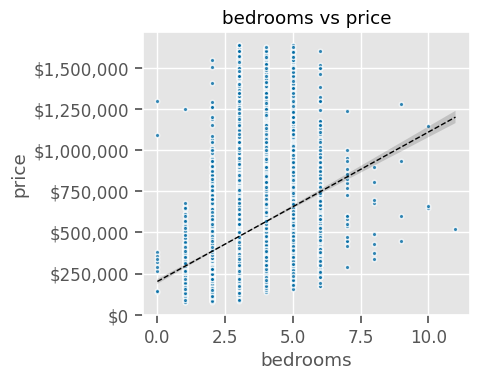

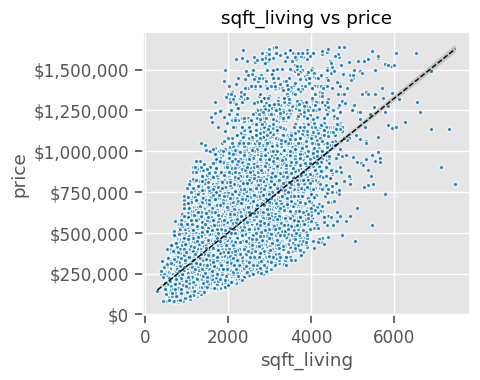

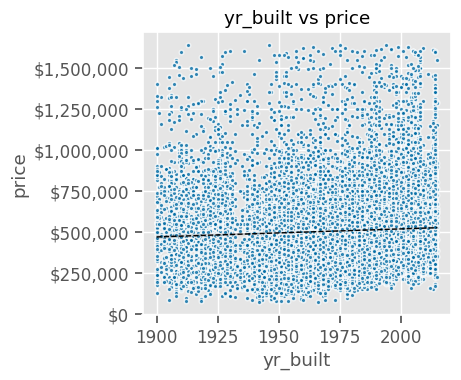

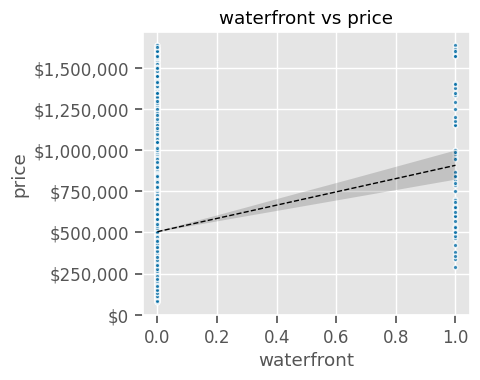

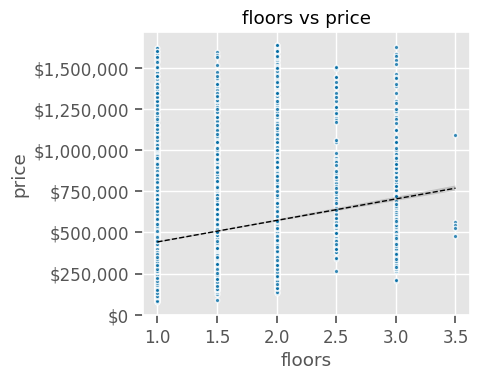

In [62]:
for feature in plot_df.drop(columns='price').columns:
    ax = plot_feature_vs_target(plot_df, x=feature,y='price')
    fig = ax.get_figure()
    fig.savefig(f'Images/regplot-{feature}-vs-price.png', dpi=300)
    plt.show()

### SLIDE IMAGE: Lin REg

In [63]:
reg_raw = LinearRegression(fit_intercept=True)
reg_raw.fit(X_train_raw,y_train)
display(reg_raw)
evaluate_regression(reg_raw, X_train_raw, y_train, X_test_raw, y_test)

LinearRegression()

In [64]:
def get_coefficients(reg, name='Coefficients'):
    """Save a model's .coef_ and .intercept_ as a Pandas Series"""
    
    coeffs = pd.Series(reg.coef_, 
                       index= reg.feature_names_in_,
                       name=name)
    
    coeffs.loc['Intercept'] = reg.intercept_
    return coeffs

## Saving the coefficients
coeffs = get_coefficients(reg_raw)
coeffs

bathrooms        48,654.2442
bedrooms        -43,470.2626
sqft_living         218.5345
yr_built         -2,623.8721
waterfront      280,693.6622
floors           64,850.5739
Intercept     5,181,319.0298
Name: Coefficients, dtype: float64

In [65]:
coeffs = get_coeffs(reg_raw)
coeffs

bathrooms        48,654.2442
bedrooms        -43,470.2626
sqft_living         218.5345
yr_built         -2,623.8721
waterfront      280,693.6622
floors           64,850.5739
Intercept     5,181,319.0298
dtype: float64

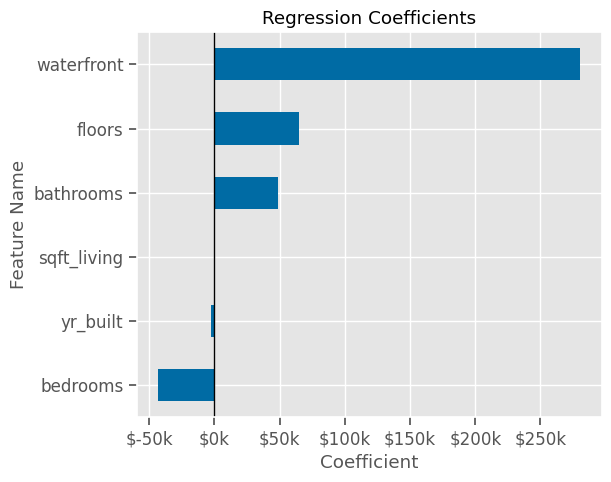

In [66]:
def plot_coefficients(coeffs, figsize=(6,5), title='Regression Coefficients',
                      intercept=True, intercept_name='Intercept',
                      sort_values=True, ascending=True, 
                      ):
    ## Exclude intercept if intercept==False
    if intercept==False:
        if intercept_name in coeffs:
            coeffs = coeffs.drop(intercept_name).copy()
    
    ## Sort values
    if sort_values:
        ceoffs = coeffs.sort_values(ascending=ascending)
 
    ## Plot
    ax = ceoffs.plot(kind='barh',figsize=figsize)
    
    ## Customize Viz 
    ax.axvline(0,color='k', lw=1)
    ax.set(ylabel='Feature Name',xlabel='Coefficient',title=title)
    return ax


ax = plot_coefficients(coeffs, intercept=False)
ax.xaxis.set_major_formatter(price_fmt_thous)

In [67]:
X_train_raw.head(3)

bathrooms  bedrooms  sqft_living   yr_built  waterfront  floors
id                                                                         
2895600090     1.0000    3.0000   1,120.0000 1,954.0000      0.0000  1.0000
8563000110     1.7500    4.0000   1,460.0000 1,967.0000      0.0000  1.0000
2591800340     2.2500    3.0000   1,820.0000 1,983.0000      0.0000  2.0000

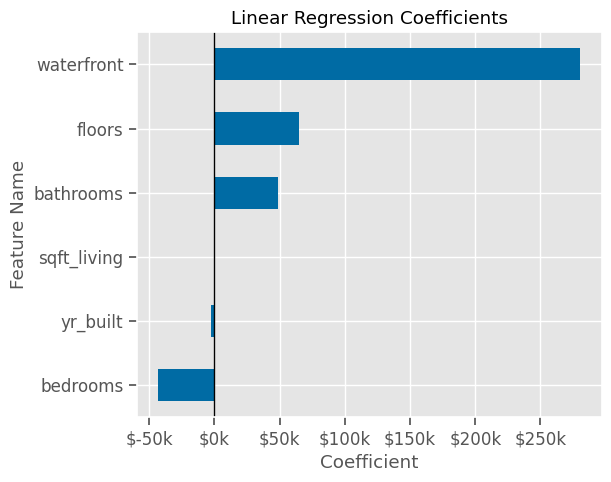

In [68]:
ax = plot_coeffs(reg_raw, intercept=False, title='Linear Regression Coefficients')
ax.xaxis.set_major_formatter(price_fmt_thous)
# lp.annotate_hbars(ax)

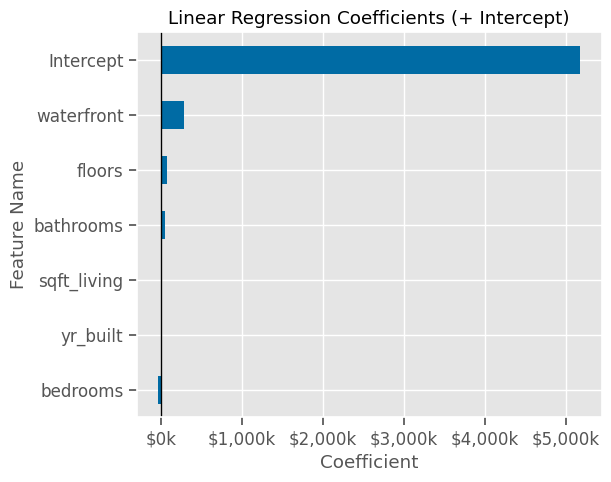

In [69]:
ax = plot_coeffs(reg_raw, intercept=True, title='Linear Regression Coefficients (+ Intercept)')
ax.xaxis.set_major_formatter(price_fmt_thous)
# lp.annotate_hbars(ax)

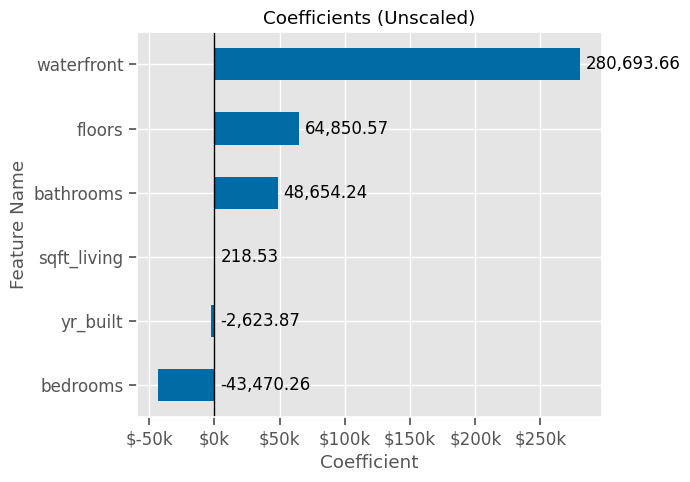

In [70]:
ax = plot_coeffs(reg_raw, intercept=False, title='Coefficients (Unscaled)')
ax.xaxis.set_major_formatter(price_fmt_thous)
lp.annotate_hbars(ax)
ax.get_figure().savefig('Images/demo-unscaled-coeffs.png', dpi=300)

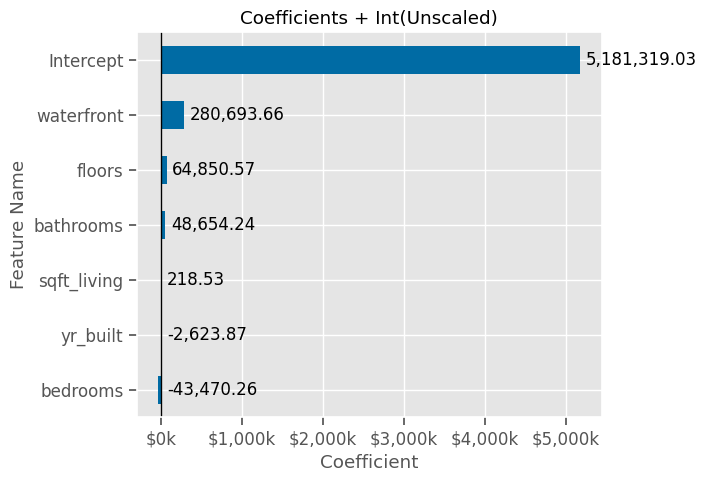

In [71]:
ax = plot_coeffs(reg_raw, intercept=True, title='Coefficients + Int(Unscaled)')
ax.xaxis.set_major_formatter(price_fmt_thous)
lp.annotate_hbars(ax)
ax.get_figure().savefig('Images/demo-unscaled-coeffs-intercept.png', dpi=300)

In [72]:
get_coefficients(reg_raw, name='Coefficients (Unscaled)')

bathrooms        48,654.2442
bedrooms        -43,470.2626
sqft_living         218.5345
yr_built         -2,623.8721
waterfront      280,693.6622
floors           64,850.5739
Intercept     5,181,319.0298
Name: Coefficients (Unscaled), dtype: float64

### Scaled

In [73]:
num_pipe_scale = make_pipeline( SimpleImputer(strategy='mean'),  
                         StandardScaler()
                        )
preprocessor_scale = make_column_transformer( (num_pipe_scale, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)

preprocessor_scale.fit(X_train)
feature_names_scale = preprocessor_scale.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_scale = pd.DataFrame( preprocessor_scale.transform(X_train), 
                          columns = feature_names_scale,
                         index = X_train.index)

## Prepare X_test_df
X_test_scale = pd.DataFrame( preprocessor_scale.transform(X_test),
                          columns = feature_names_scale,
                         index=X_test.index)
X_train_scale

bathrooms  bedrooms  sqft_living  yr_built  waterfront  floors
id                                                                        
2895600090    -1.4718   -0.3858      -1.0873   -0.5816     -0.0626 -0.9053
8563000110    -0.4557    0.7217      -0.6796   -0.1372     -0.0626 -0.9053
2591800340     0.2218   -0.3858      -0.2480    0.4097     -0.0626  0.9468
7215721330     0.5605   -0.3858      -0.4518    0.9908     -0.0626  0.9468
7502800030     0.8992    0.7217       1.8262    1.4693     -0.0626  0.9468
...               ...       ...          ...       ...         ...     ...
3211200140    -0.1169    0.7217      -0.3679   -0.0005     -0.0626 -0.9053
6381502155    -1.4718   -0.3858      -0.6436   -0.5816     -0.0626 -0.9053
8964800695    -0.4557   -0.3858       0.2436   -0.7525     -0.0626 -0.9053
2320069206    -1.4718   -0.3858      -0.9314   -1.0943     -0.0626  0.0208
624100010      0.5605   -0.3858       1.0829    0.4097     -0.0626  0.0208

[15904 rows x 6 columns]

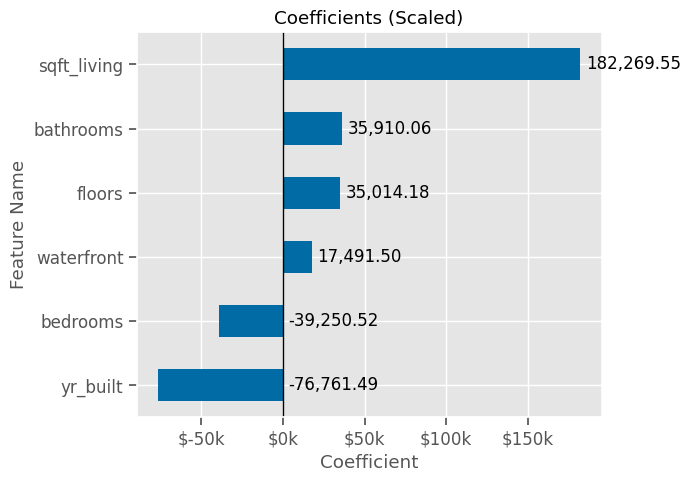

In [74]:
reg_scale = LinearRegression(fit_intercept=True)
reg_scale.fit(X_train_scale,y_train)
evaluate_regression(reg_scale, X_train_scale, y_train, X_test_scale, y_test)

ax = plot_coeffs(reg_scale,intercept=False, title='Coefficients (Scaled)')
ax.xaxis.set_major_formatter(price_fmt_thous)

lp.annotate_hbars(ax)
ax.get_figure().savefig('Images/demo-scaled-coeffs.png', dpi=300)

In [75]:
get_coefficients(reg_scale, name='Coefficients (Scaled)')

bathrooms      35,910.0566
bedrooms      -39,250.5164
sqft_living   182,269.5485
yr_built      -76,761.4902
waterfront     17,491.5014
floors         35,014.1755
Intercept     506,158.9770
Name: Coefficients (Scaled), dtype: float64

### Getting STD of Features to Interpret Coefficient

In [76]:
std_for_coeffs = np.std(X_train_raw)
std_for_coeffs.name='Standard Deviation'
std_for_coeffs

bathrooms       0.7381
bedrooms        0.9029
sqft_living   834.0538
yr_built       29.2550
waterfront      0.0623
floors          0.5399
Name: Standard Deviation, dtype: float64

### MATPLOTLIB IGNORING FIGSIZE

In [77]:
import matplotlib
matplotlib.__version__

'3.5.3'

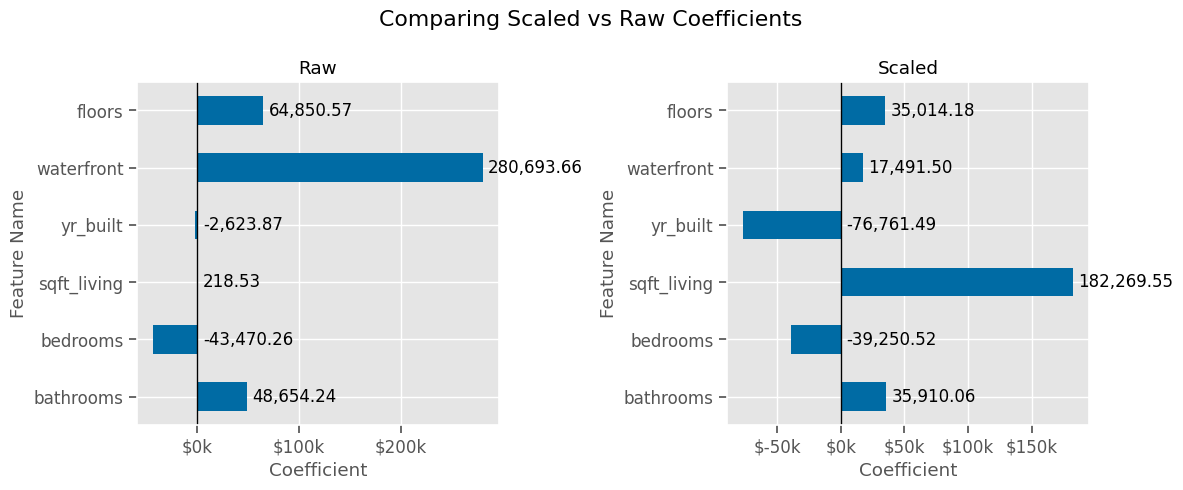

In [78]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5))

plot_coeffs(reg_raw, intercept=False,sort_values=False, ax=axes[0])
axes[0].set_title('Raw')
lp.annotate_hbars(axes[0])
axes[0].xaxis.set_major_formatter(price_fmt_thous)

plot_coeffs(reg_scale,intercept=False, sort_values=False,ax=axes[1])
axes[1].set_title('Scaled')
lp.annotate_hbars(axes[1])
axes[1].xaxis.set_major_formatter(price_fmt_thous)
# fig.set_size_inches((18,5))
fig.suptitle("Comparing Scaled vs Raw Coefficients")
fig.tight_layout();
fig.savefig('Images/demo_raw_scaled_coeffs.png',dpi=300)

### Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,plot_tree

In [80]:
MAX_DEPTH = 7
reg_tree = DecisionTreeRegressor(max_depth=MAX_DEPTH)#max_depth=MAX_DEPTH)
reg_tree.fit(X_train_raw,y_train)

display(reg_tree)
evaluate_regression(reg_tree, X_train_raw, y_train, 
                    X_test_raw, y_test)

DecisionTreeRegressor(max_depth=7)

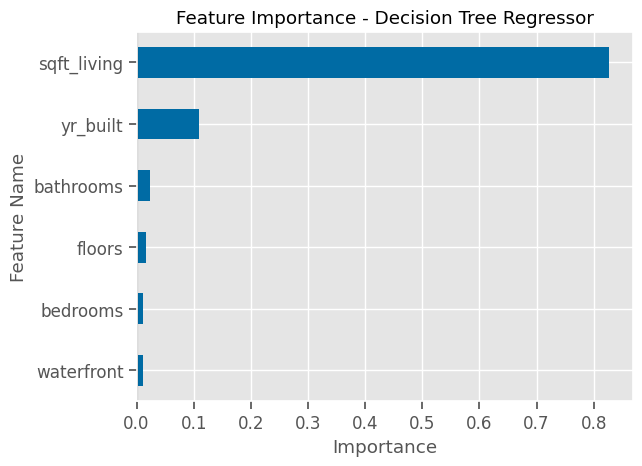

In [81]:
# Saving the coefficients
importances = pd.Series(reg_tree.feature_importances_, index= reg_tree.feature_names_in_)
# coeffs.loc['Intercept'] = reg.intercept_
ax = importances.sort_values().plot(kind='barh')#,figsize=(6,4))
ax.axvline(0, color='k')
ax.set(title='Feature Importance - Decision Tree Regressor',ylabel="Feature Name",
      xlabel='Importance');
ax.get_figure().savefig('Images/feature-importance-tree.png', dpi=300)

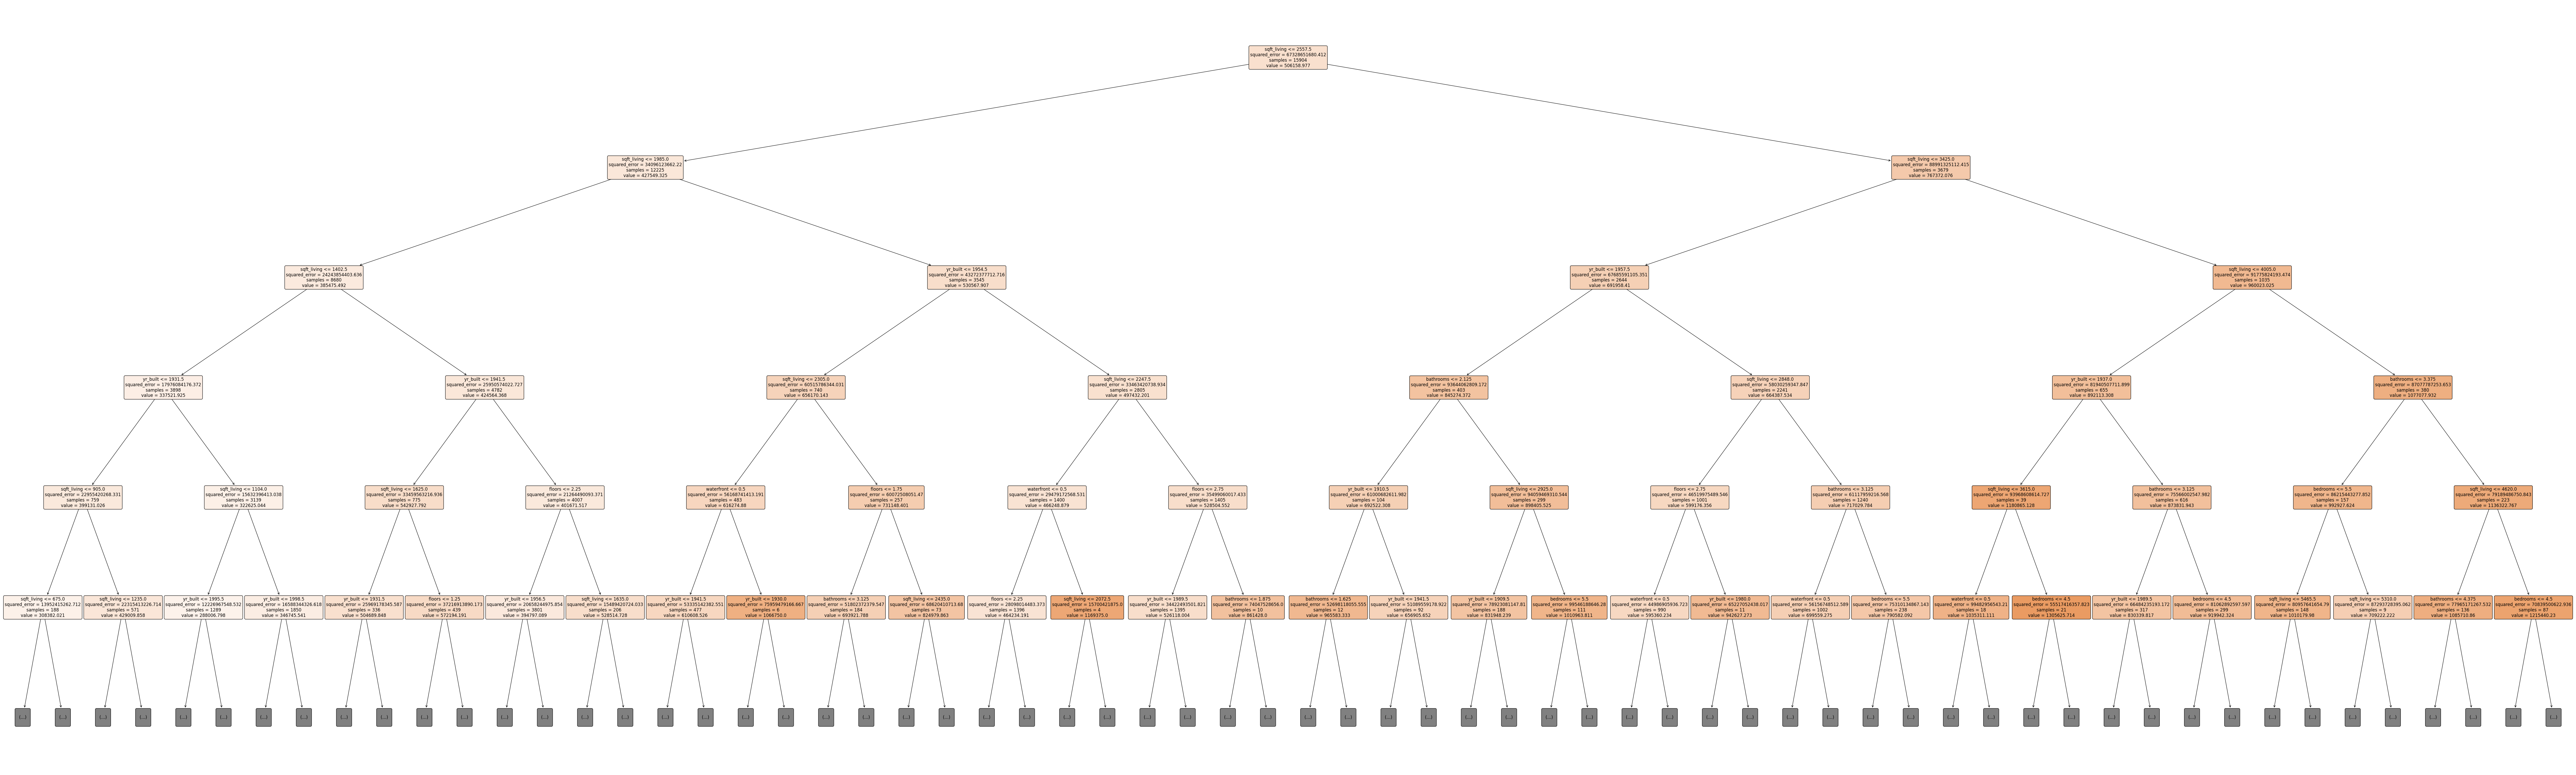

In [82]:
PLOT_DEPTH = 5
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(100,30))
    plot_tree(reg_tree,filled=True,max_depth=PLOT_DEPTH, rounded=True,
              feature_names=reg_tree.feature_names_in_,
             fontsize=12,ax=ax);
    fig.tight_layout()
    
    fig.savefig(f'Images/plot_tree_demo_depth{PLOT_DEPTH}.png',dpi=150,
               bbox_inches='tight',facecolor='white')

In [83]:
# 2**16

### RandomForest

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rf_reg = RandomForestRegressor(random_state=3210)
rf_reg.fit(X_train_raw,y_train)
display(rf_reg)
evaluate_regression(rf_reg, X_train_raw, y_train, X_test_raw, y_test)

RandomForestRegressor(random_state=3210)

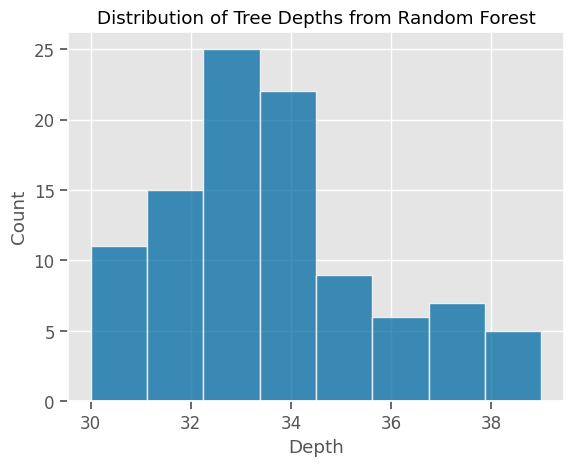

In [86]:
depths = [tree.get_depth() for tree in rf_reg.estimators_]
ax = sns.histplot(depths)
ax.set(title='Distribution of Tree Depths from Random Forest',
      xlabel='Depth');

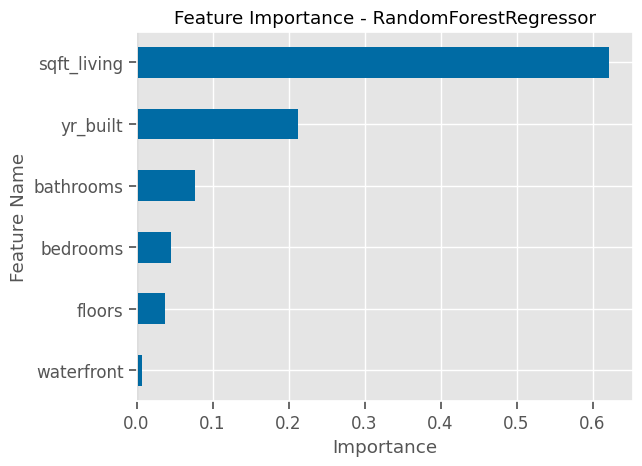

In [87]:
# Saving the feature importances
importances = pd.Series(rf_reg.feature_importances_, index= rf_reg.feature_names_in_)
ax = importances.sort_values().plot(kind='barh')#,figsize=(6,4))
ax.axvline(0, color='k')
ax.set(title='Feature Importance - RandomForestRegressor',ylabel="Feature Name",
      xlabel='Importance');
ax.get_figure().savefig('Images/feature-importance-forest.png', dpi=300)

### QUICK TEST: Shap with Regresssion

In [88]:
# Import and init shap
import shap
shap.initjs()

In [89]:
# Take a sample of the training data
X_shap = shap.sample(X_train_df,nsamples = 500)
y_shap = y_train.loc[X_shap.index]

# Instantiate a Model Explainer with the model
explainer = shap.Explainer(rf_reg)
explainer

In [90]:
## Get shap values form the explainer
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [91]:
## nrows, ncols for X_shap
X_shap.shape

(500, 14)

In [92]:
## nrows, ncols, nclasses for shap_values
shap_values.shape

(500, 14)

#### Shap Explanation Objects

In [93]:
# A single observation/explanation
explanation0 = shap_values[0]
explanation0

.values =
array([  -9948.98321868,   38854.77223125, -272903.31535208,
         15995.44279008,   72796.17708861,   -1853.13372447,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ])

.base_values =
array([506240.22351861])

.data =
array([2.00e+00, 1.00e+00, 1.07e+03, 5.28e+03, 1.00e+00, 0.00e+00,
       3.00e+00, 6.00e+00, 1.07e+03, 0.00e+00, 1.90e+03, 0.00e+00,
       1.38e+03, 2.37e+03])

In [94]:
y_shap.iloc[0]

510000.0

# MAIN NOTEBOOK CONTINUE'D

# Pivoting to Classification Task

In [95]:
def make_target_and_plot(df_ml, THRESH = 1e6):
    df_ml = df_ml.copy()
    df_ml['Expensive'] = df_ml['price'] > THRESH

    grid_spec = {'width_ratios':[0.8,0.2]}
    fig, axes = plt.subplots(ncols=2, gridspec_kw=grid_spec, figsize=(12,3),)

    ax=axes[0]
    sns.boxplot(data=df_ml,x='price',ax=ax)
    ax.axvline(THRESH,color='red',ls='--',label=f"Threshold ${THRESH:,.2f}")
    ax.legend()
    # ax.get_figure().set_size_inches(10,4)


    ax = axes[1]
    ax = sns.countplot(data=df_ml, x='Expensive',ax=ax)

    fig.tight_layout()
    
    return df_ml

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                            
7129300520 221,900.0000         3     1.0000         1180      5650  1.0000   
6414100192 538,000.0000         3     2.2500         2570      7242  2.0000   
5631500400 180,000.0000         2     1.0000          770     10000  1.0000   
2487200875 604,000.0000         4     3.0000         1960      5000  1.0000   
1954400510 510,000.0000         3     2.0000         1680      8080  1.0000   
...                 ...       ...        ...          ...       ...     ...   
263000018  360,000.0000         3     2.5000         1530      1131  3.0000   
6600060120 400,000.0000         4     2.5000         2310      5813  2.0000   
1523300141 402,101.0000         2     0.7500         1020      1350  2.0000   
291310100  400,000.0000         3     2.5000         1600      2388  2.0000   
1523300157 325,000.0000         2     0.7500         1020      1076  2.0000   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520           0     0          3      7        1180              0   
6414100192           0     0          3      7        2170            400   
5631500400           0     0          3      6         770              0   
2487200875           0     0          5      7        1050            910   
1954400510           0     0          3      8        1680              0   
...                ...   ...        ...    ...         ...            ...   
263000018            0     0          3      8        1530              0   
6600060120           0     0          3      8        2310              0   
1523300141           0     0          3      7        1020              0   
291310100            0     0          3      8        1600              0   
1523300157           0     0          3      7        1020              0   

            yr_built  yr_renovated zipcode     lat      long  sqft_living15  \
id                                                                            
7129300520      1955             0   98178 47.5112 -122.2570           1340   
6414100192      1951          1991   98125 47.7210 -122.3190           1690   
5631500400      1933             0   98028 47.7379 -122.2330           2720   
2487200875      1965             0   98136 47.5208 -122.3930           1360   
1954400510      1987             0   98074 47.6168 -122.0450           1800   
...              ...           ...     ...     ...       ...            ...   
263000018       2009             0   98103 47.6993 -122.3460           1530   
6600060120      2014             0   98146 47.5107 -122.3620           1830   
1523300141      2009             0   98144 47.5944 -122.2990           1020   
291310100       2004             0   98027 47.5345 -122.0690           1410   
1523300157      2008             0   98144 47.5941 -122.2990           1020   

            sqft_lot15  Expensive  
id                                 
7129300520        5650      False  
6414100192        7639       True  
5631500400        8062      False  
2487200875        5000       True  
1954400510        7503       True  
...                ...        ...  
263000018         1509      False  
6600060120        7200      False  
1523300141        2007      False  
291310100         1287      False  
1523300157        1357      False  

[21206 rows x 20 columns]

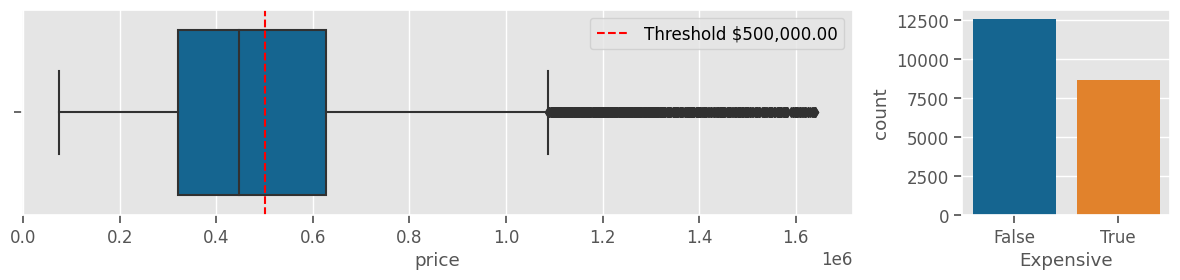

In [96]:
df_ml = make_target_and_plot(df_ml, THRESH=500_000)#THRESH=500_000)
df_ml

In [97]:
df_ml

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                            
7129300520 221,900.0000         3     1.0000         1180      5650  1.0000   
6414100192 538,000.0000         3     2.2500         2570      7242  2.0000   
5631500400 180,000.0000         2     1.0000          770     10000  1.0000   
2487200875 604,000.0000         4     3.0000         1960      5000  1.0000   
1954400510 510,000.0000         3     2.0000         1680      8080  1.0000   
...                 ...       ...        ...          ...       ...     ...   
263000018  360,000.0000         3     2.5000         1530      1131  3.0000   
6600060120 400,000.0000         4     2.5000         2310      5813  2.0000   
1523300141 402,101.0000         2     0.7500         1020      1350  2.0000   
291310100  400,000.0000         3     2.5000         1600      2388  2.0000   
1523300157 325,000.0000         2     0.7500         1020      1076  2.0000   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520           0     0          3      7        1180              0   
6414100192           0     0          3      7        2170            400   
5631500400           0     0          3      6         770              0   
2487200875           0     0          5      7        1050            910   
1954400510           0     0          3      8        1680              0   
...                ...   ...        ...    ...         ...            ...   
263000018            0     0          3      8        1530              0   
6600060120           0     0          3      8        2310              0   
1523300141           0     0          3      7        1020              0   
291310100            0     0          3      8        1600              0   
1523300157           0     0          3      7        1020              0   

            yr_built  yr_renovated zipcode     lat      long  sqft_living15  \
id                                                                            
7129300520      1955             0   98178 47.5112 -122.2570           1340   
6414100192      1951          1991   98125 47.7210 -122.3190           1690   
5631500400      1933             0   98028 47.7379 -122.2330           2720   
2487200875      1965             0   98136 47.5208 -122.3930           1360   
1954400510      1987             0   98074 47.6168 -122.0450           1800   
...              ...           ...     ...     ...       ...            ...   
263000018       2009             0   98103 47.6993 -122.3460           1530   
6600060120      2014             0   98146 47.5107 -122.3620           1830   
1523300141      2009             0   98144 47.5944 -122.2990           1020   
291310100       2004             0   98027 47.5345 -122.0690           1410   
1523300157      2008             0   98144 47.5941 -122.2990           1020   

            sqft_lot15  Expensive  
id                                 
7129300520        5650      False  
6414100192        7639       True  
5631500400        8062      False  
2487200875        5000       True  
1954400510        7503       True  
...                ...        ...  
263000018         1509      False  
6600060120        7200      False  
1523300141        2007      False  
291310100         1287      False  
1523300157        1357      False  

[21206 rows x 20 columns]

In [98]:
## Make x and y variables
target = 'Expensive'
drop_cols_model = ['zipcode','lat','long','view','price']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='if_binary',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
#                          StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

bedrooms  bathrooms  sqft_living    sqft_lot  floors  waterfront  \
id                                                                             
2895600090    3.0000     1.0000   1,120.0000  7,320.0000  1.0000      0.0000   
8563000110    4.0000     1.7500   1,460.0000  9,750.0000  1.0000      0.0000   
2591800340    3.0000     2.2500   1,820.0000  7,420.0000  2.0000      0.0000   
7215721330    3.0000     2.5000   1,650.0000  4,218.0000  2.0000      0.0000   
7502800030    4.0000     2.7500   3,550.0000  9,400.0000  2.0000      0.0000   
...              ...        ...          ...         ...     ...         ...   
3211200140    4.0000     2.0000   1,720.0000  7,210.0000  1.0000      0.0000   
6381502155    3.0000     1.0000   1,490.0000  7,200.0000  1.0000      0.0000   
8964800695    3.0000     1.7500   2,230.0000 13,529.0000  1.0000      0.0000   
2320069206    3.0000     1.0000   1,250.0000  8,276.0000  1.5000      0.0000   
624100010     3.0000     2.5000   2,930.0000 19,900.0000  1.5000      0.0000   

            condition  grade  sqft_above  sqft_basement   yr_built  \
id                                                                   
2895600090     4.0000 7.0000  1,120.0000         0.0000 1,954.0000   
8563000110     4.0000 7.0000  1,460.0000         0.0000 1,967.0000   
2591800340     4.0000 8.0000  1,820.0000         0.0000 1,983.0000   
7215721330     3.0000 8.0000  1,650.0000         0.0000 2,000.0000   
7502800030     3.0000 9.0000  3,550.0000         0.0000 2,014.0000   
...               ...    ...         ...            ...        ...   
3211200140     3.0000 7.0000    860.0000       860.0000 1,971.0000   
6381502155     3.0000 7.0000  1,490.0000         0.0000 1,954.0000   
8964800695     3.0000 9.0000  2,230.0000         0.0000 1,949.0000   
2320069206     5.0000 6.0000  1,250.0000         0.0000 1,939.0000   
624100010      3.0000 9.0000  2,930.0000         0.0000 1,983.0000   

            yr_renovated  sqft_living15  sqft_lot15  
id                                                   
2895600090        0.0000     1,410.0000  6,328.0000  
8563000110        0.0000     1,820.0000  9,840.0000  
2591800340        0.0000     1,900.0000  7,526.0000  
7215721330        0.0000     1,650.0000  4,559.0000  
7502800030        0.0000     3,550.0000  9,421.0000  
...                  ...            ...         ...  
3211200140        0.0000     1,250.0000  7,210.0000  
6381502155        0.0000     1,280.0000  7,200.0000  
8964800695        0.0000     2,230.0000 11,900.0000  
2320069206        0.0000     1,250.0000  8,792.0000  
624100010         0.0000     3,160.0000 20,492.0000  

[15904 rows x 14 columns]

In [99]:
from sklearn.ensemble import RandomForestClassifier

--------------------------------------------------------------------------------
	CLASSIFICATION REPORT : (Admin)
--------------------------------------------------------------------------------
[i] Training Data:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9451
        True       1.00      1.00      1.00      6453

    accuracy                           1.00     15904
   macro avg       1.00      1.00      1.00     15904
weighted avg       1.00      1.00      1.00     15904



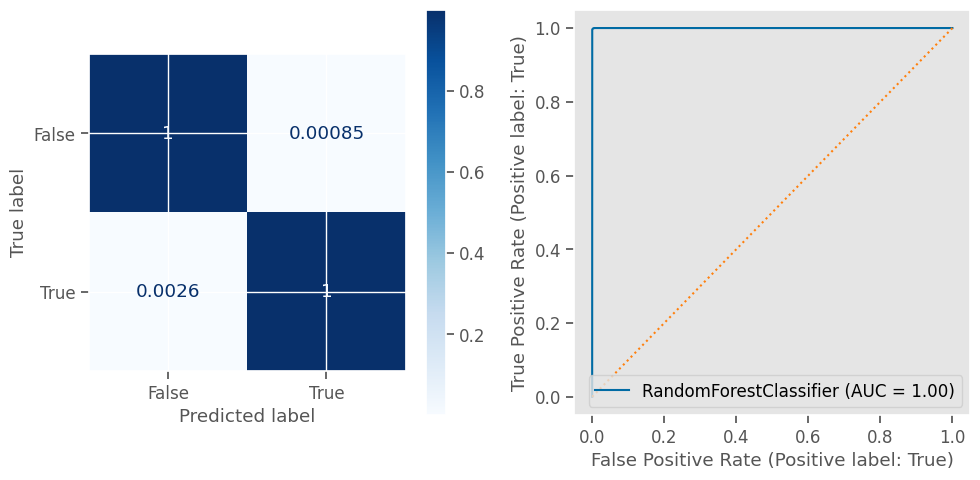

--------------------------------------------------------------------------------
[i] Test Data:
              precision    recall  f1-score   support

       False       0.85      0.88      0.87      3109
        True       0.82      0.78      0.80      2193

    accuracy                           0.84      5302
   macro avg       0.84      0.83      0.83      5302
weighted avg       0.84      0.84      0.84      5302



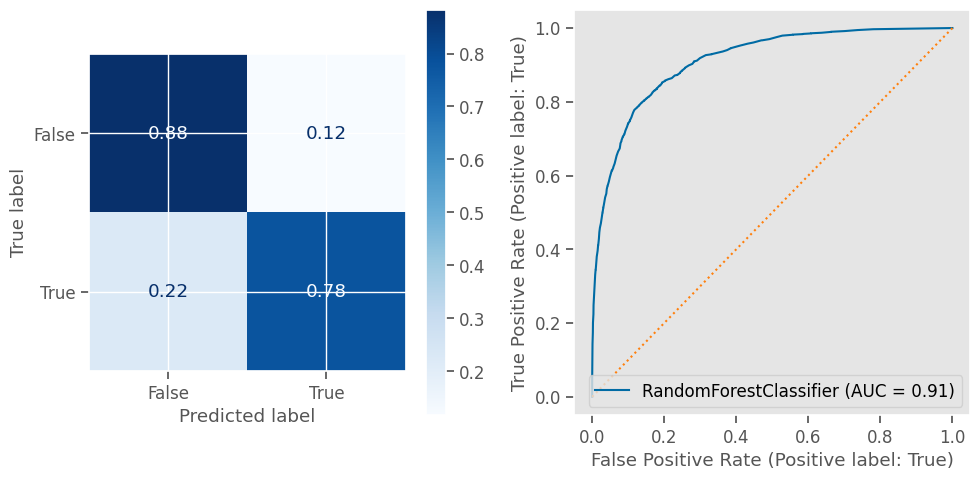

In [100]:
clf = RandomForestClassifier()
clf.fit(X_train_df,y_train)

lp.evaluate_classification_admin(clf, X_train_df, y_train, X_test_df, y_test)

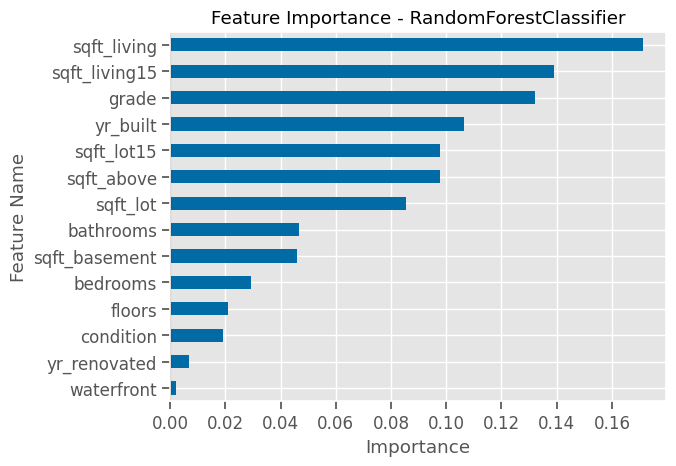

In [101]:
# Saving the coefficients
importances = pd.Series(clf.feature_importances_, index= clf.feature_names_in_)
# coeffs.loc['Intercept'] = reg.intercept_
ax = importances.sort_values().plot(kind='barh')#,figsize=(6,4))
ax.axvline(0, color='k')
ax.set(title='Feature Importance - RandomForestClassifier',ylabel="Feature Name",
      xlabel='Importance');
ax.get_figure().savefig('Images/feature-importance-forest.png', dpi=300)

In [102]:
# ax.axvline(0,color='k', lw=1)
# importances

## Model Explainers - SHAP

In [103]:
# Import and init shap
import shap
shap.initjs()

In [104]:
# Take a sample of the training data
X_shap = shap.sample(X_train_df,nsamples = 500)
y_shap = y_train.loc[X_shap.index]

# Instantiate a Model Explainer with the model
explainer = shap.Explainer(clf)
explainer

In [105]:
## Get shap values form the explainer
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [106]:
## nrows, ncols for X_shap
X_shap.shape

(500, 14)

In [107]:
## nrows, ncols, nclasses for shap_values
shap_values.shape

(500, 14, 2)

### Shap Explanation Objects

In [108]:
# A single observation/explanation
explanation0 = shap_values[0]
explanation0

.values =
array([[-2.35033632e-02,  2.35033632e-02],
       [ 1.31245132e-02, -1.31245132e-02],
       [ 5.71203366e-02, -5.71203366e-02],
       [-6.05850163e-02,  6.05850163e-02],
       [-1.26379139e-02,  1.26379139e-02],
       [ 7.71769801e-04, -7.71769801e-04],
       [ 8.07653595e-03, -8.07653595e-03],
       [ 1.07971429e-01, -1.07971429e-01],
       [-1.47976603e-02,  1.47976603e-02],
       [ 4.77220281e-05, -4.77220281e-05],
       [-2.11203642e-01,  2.11203642e-01],
       [-1.28577090e-03,  1.28577090e-03],
       [ 1.26465335e-02, -1.26465335e-02],
       [-1.60043134e-01,  1.60043134e-01]])

.base_values =
array([0.59429766, 0.40570234])

.data =
array([2.00e+00, 1.00e+00, 1.07e+03, 5.28e+03, 1.00e+00, 0.00e+00,
       3.00e+00, 6.00e+00, 1.07e+03, 0.00e+00, 1.90e+03, 0.00e+00,
       1.38e+03, 2.37e+03])

In [109]:
# explanation's .data is just the original X-rows values
X_shap.iloc[0].values

array([2.00e+00, 1.00e+00, 1.07e+03, 5.28e+03, 1.00e+00, 0.00e+00,
       3.00e+00, 6.00e+00, 1.07e+03, 0.00e+00, 1.90e+03, 0.00e+00,
       1.38e+03, 2.37e+03])

In [110]:
explanation0.base_values

array([0.59429766, 0.40570234])

In [111]:
shap_vals_expensive = shap_values[:,:,1]
shap_vals_expensive.shape

(500, 14)

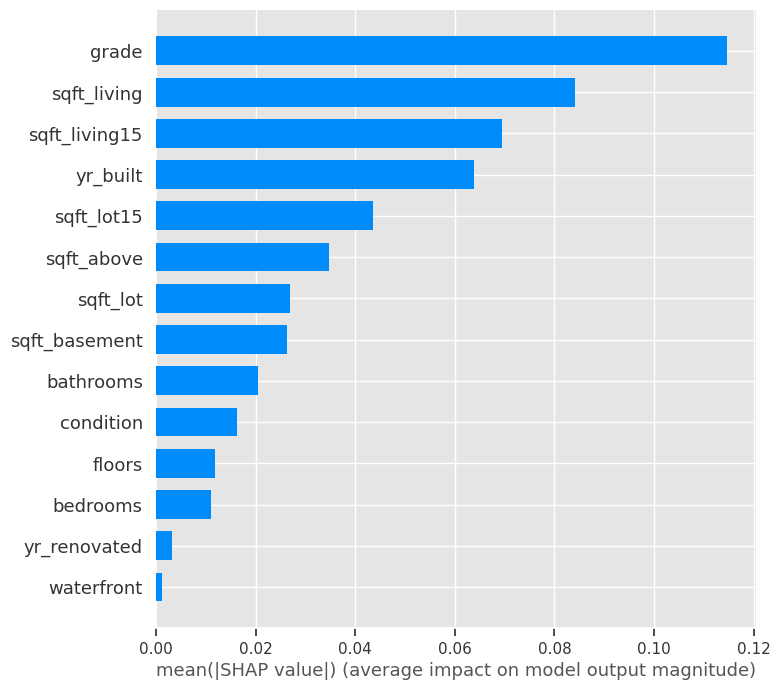

In [112]:
shap.summary_plot(shap_vals_expensive,features= X_shap, plot_type='bar')

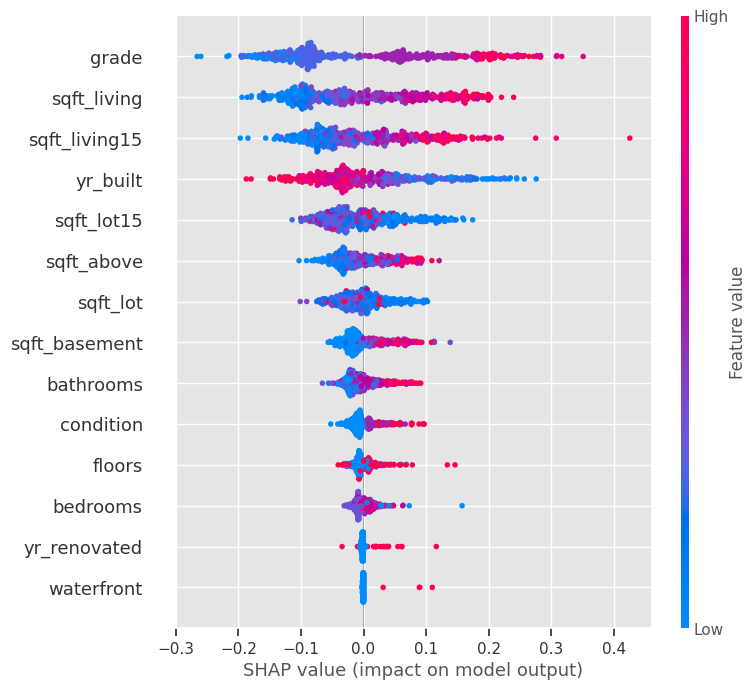

In [113]:
shap.summary_plot(shap_vals_expensive,X_shap)

In [114]:
# shap.dependence_plot("yr_built",shap_vals_expensive.values,features=X_shap)

## Part 2 - Time Series

In [115]:
pd.set_option('display.max_rows',100)

In [116]:
df['yr_built']

id
7129300520    1955
6414100192    1951
5631500400    1933
2487200875    1965
1954400510    1987
              ... 
263000018     2009
6600060120    2014
1523300141    2009
291310100     2004
1523300157    2008
Name: yr_built, Length: 21613, dtype: int64

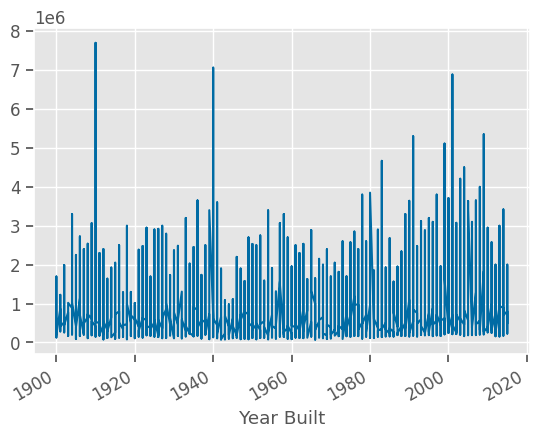

In [117]:
df['Year Built'] = pd.to_datetime(df['yr_built'],format="%Y")
ts = df.set_index("Year Built")['price'].sort_index()
ts.plot();

In [118]:
ts_count = ts.resample('Y').count()
ts_count

Year Built
1900-12-31     87
1901-12-31     29
1902-12-31     27
1903-12-31     46
1904-12-31     45
             ... 
2011-12-31    130
2012-12-31    170
2013-12-31    201
2014-12-31    559
2015-12-31     38
Freq: A-DEC, Name: price, Length: 116, dtype: int64

<AxesSubplot:title={'center':'# of Homes'}, xlabel='Year Built'>

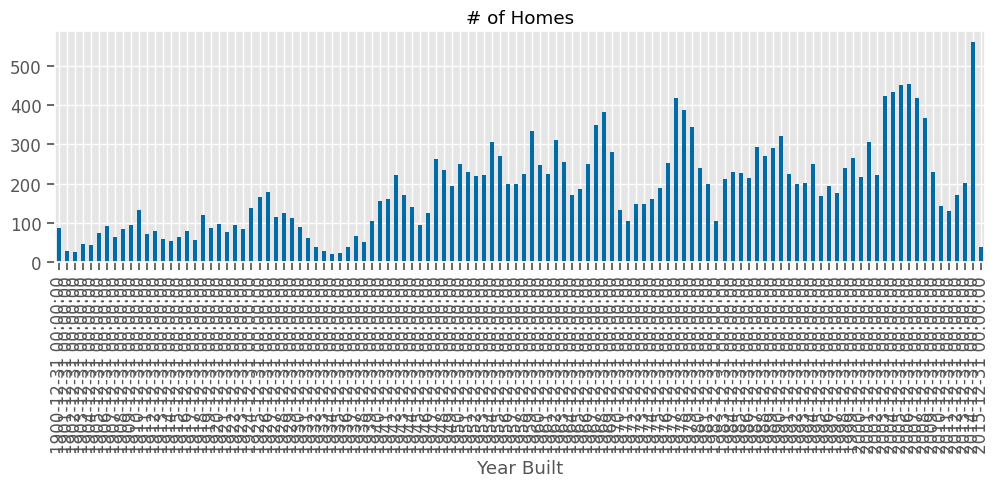

In [119]:
ts_count.plot(title ='# of Homes',figsize=(12,3),kind='bar')#style='.-', 

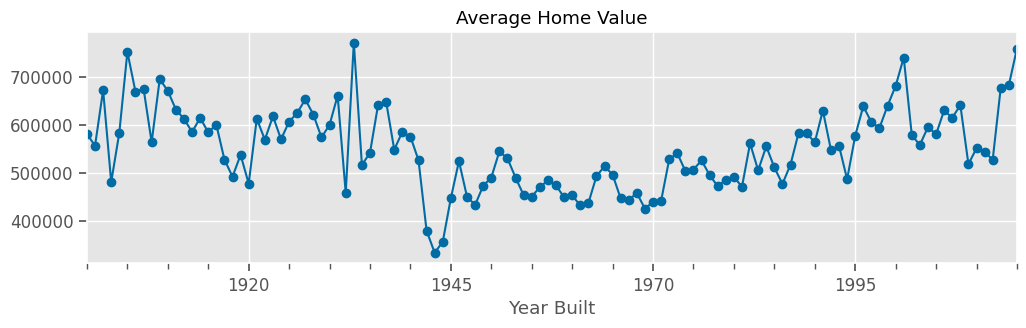

In [120]:
ts_mean = ts.resample('Y').mean()
ts_mean.plot(style='o-',figsize=(12,3), title='Average Home Value');

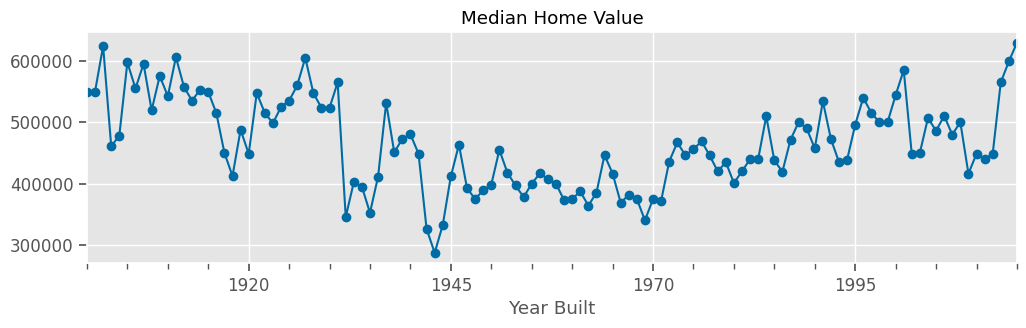

In [121]:
ts_median = ts.resample('Y').median()
ts_median.plot(style='o-',figsize=(12,3), title='Median Home Value');

### TS - Price when sold

In [122]:
df['Date'] = pd.to_datetime(df['date'])
df_ts = df.set_index("Date").sort_index()
df_ts

date          price  bedrooms  bathrooms  sqft_living  \
Date                                                                           
2014-05-02  20140502T000000   437,500.0000         3     2.2500         1970   
2014-05-02  20140502T000000   790,000.0000         3     2.5000         2600   
2014-05-02  20140502T000000   675,000.0000         5     2.5000         2820   
2014-05-02  20140502T000000   555,000.0000         4     2.5000         3310   
2014-05-02  20140502T000000   440,000.0000         4     2.2500         2160   
...                     ...            ...       ...        ...          ...   
2015-05-14  20150514T000000   183,000.0000         3     1.0000         1170   
2015-05-14  20150514T000000   359,000.0000         2     2.7500         1370   
2015-05-15  20150515T000000   450,000.0000         5     2.0000         1870   
2015-05-24  20150524T000000   445,500.0000         2     1.7500         1390   
2015-05-27  20150527T000000 1,310,000.0000         4     2.2500         3750   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
Date                                                                           
2014-05-02     35100  2.0000           0     0          4      9        1970   
2014-05-02      4750  1.0000           0     0          4      9        1700   
2014-05-02     67518  2.0000           0     0          3      8        2820   
2014-05-02      6500  2.0000           0     0          3      8        3310   
2014-05-02      8119  1.0000           0     0          3      8        1080   
...              ...     ...         ...   ...        ...    ...         ...   
2015-05-14      7320  1.0000           0     0          3      7        1170   
2015-05-14      1140  2.0000           0     0          3      8        1080   
2015-05-15      7344  1.5000           0     0          3      7        1870   
2015-05-24      6670  1.0000           0     0          3      6         720   
2015-05-27      5000  2.0000           0     0          5      8        2440   

            sqft_basement  yr_built  yr_renovated zipcode     lat      long  \
Date                                                                          
2014-05-02              0      1977             0   98027 47.4635 -121.9910   
2014-05-02            900      1951             0   98117 47.6833 -122.4000   
2014-05-02              0      1979             0   98029 47.5794 -122.0250   
2014-05-02              0      2012             0   98065 47.5150 -121.8700   
2014-05-02           1080      1966             0   98006 47.5443 -122.1770   
...                   ...       ...           ...     ...     ...       ...   
2015-05-14              0      1962             0   98188 47.4685 -122.2820   
2015-05-14            290      2009             0   98133 47.7052 -122.3430   
2015-05-15              0      1960             0   98007 47.5951 -122.1440   
2015-05-24            670      1941             0   98115 47.6914 -122.3080   
2015-05-27           1310      1924             0   98115 47.6747 -122.3030   

            sqft_living15  sqft_lot15 Year Built  
Date                                              
2014-05-02           2340       35100 1977-01-01  
2014-05-02           2380        4750 1951-01-01  
2014-05-02           2820       48351 1979-01-01  
2014-05-02           2380        5000 2012-01-01  
2014-05-02           1850        9000 1966-01-01  
...                   ...         ...        ...  
2015-05-14           2040        7320 1962-01-01  
2015-05-14           1370        1090 2009-01-01  
2015-05-15           1870        7650 1960-01-01  
2015-05-24            920        6380 1941-01-01  
2015-05-27           2170        4590 1924-01-01  

[21613 rows x 21 columns]

<AxesSubplot:xlabel='Date'>

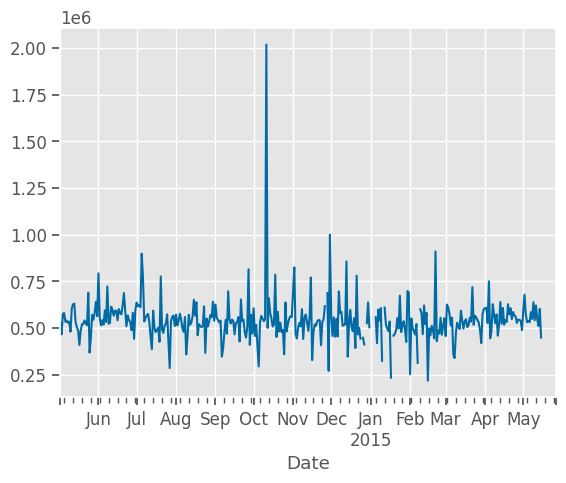

In [123]:
ts = df_ts.resample('D')['price'].mean()
ts.plot()

### how does this compare to typical home values?

In [124]:
fpath = 'Data/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
zillow = pd.read_csv(fpath)
zillow

RegionID  SizeRank  RegionName RegionType StateName State         City  \
0         91940         0       77449        zip        TX    TX          NaN   
1         91982         1       77494        zip        TX    TX          NaN   
2         93144         2       79936        zip        TX    TX      El Paso   
3         62080         3       11368        zip        NY    NY     New York   
4         62093         4       11385        zip        NY    NY     New York   
...         ...       ...         ...        ...       ...   ...          ...   
27398     80190     30657       50160        zip        IA    IA  Martensdale   
27399     65355     30657       18081        zip        PA    PA   Hellertown   
27400     80581     30657       51009        zip        IA    IA      Calumet   
27401     82217     30657       55366        zip        MN    MN          NaN   
27402     65172     30657       17762        zip        PA    PA  Hughesville   

                                             Metro        CountyName  \
0             Houston-The Woodlands-Sugar Land, TX     Harris County   
1             Houston-The Woodlands-Sugar Land, TX  Fort Bend County   
2                                      El Paso, TX    El Paso County   
3            New York-Newark-Jersey City, NY-NJ-PA     Queens County   
4            New York-Newark-Jersey City, NY-NJ-PA     Queens County   
...                                            ...               ...   
27398               Des Moines-West Des Moines, IA     Warren County   
27399  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD      Bucks County   
27400                                          NaN    O Brien County   
27401                                          NaN     Sibley County   
27402                             Williamsport, PA   Lycoming County   

        2000-01-31   2000-02-29   2000-03-31   2000-04-30   2000-05-31  \
0     106,672.0000 106,685.0000 106,488.0000 106,493.0000 106,524.0000   
1     223,357.0000 223,674.0000 224,394.0000 225,614.0000 225,179.0000   
2      90,482.0000  90,482.0000  90,515.0000  90,481.0000  90,500.0000   
3     187,749.0000 190,237.0000 191,801.0000 194,327.0000 195,885.0000   
4     275,753.0000 277,623.0000 279,568.0000 282,035.0000 283,442.0000   
...            ...          ...          ...          ...          ...   
27398          NaN          NaN          NaN          NaN          NaN   
27399          NaN          NaN          NaN          NaN          NaN   
27400          NaN          NaN          NaN          NaN          NaN   
27401          NaN          NaN          NaN          NaN          NaN   
27402          NaN          NaN          NaN          NaN          NaN   

        2000-06-30   2000-07-31   2000-08-31   2000-09-30   2000-10-31  \
0     106,736.0000 106,890.0000 107,117.0000 107,499.0000 107,733.0000   
1     224,845.0000 223,731.0000 224,071.0000 223,676.0000 224,345.0000   
2      90,460.0000  90,446.0000  90,399.0000  89,867.0000  89,234.0000   
3     197,766.0000 200,226.0000 202,532.0000 205,028.0000 208,347.0000   
4     284,643.0000 285,736.0000 288,089.0000 290,097.0000 293,436.0000   
...            ...          ...          ...          ...          ...   
27398          NaN          NaN          NaN          NaN          NaN   
27399          NaN          NaN          NaN          NaN          NaN   
27400          NaN          NaN          NaN          NaN          NaN   
27401          NaN          NaN          NaN          NaN          NaN   
27402          NaN          NaN          NaN          NaN          NaN   

        2000-11-30   2000-12-31   2001-01-31   2001-02-28   2001-03-31  \
0     108,185.0000 108,587.0000 108,642.0000 108,446.0000 107,918.0000   
1     225,511.0000 226,928.0000 227,545.0000 226,853.0000 225,988.0000   
2      88,366.0000  88,226.0000  88,180.0000  88,307.0000  87,869.0000   
3     211,976.0000 214,971.0000 217,513.0000 220,082.0000 223,254.0000   
4     296,345.0000 29

In [125]:
zillow.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '2000-01-31',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=282)

In [126]:
cut_cols = ["RegionID","SizeRank","RegionType","StateName"]
zillow = zillow.drop(columns=cut_cols)
zillow

RegionName State         City  \
0           77449    TX          NaN   
1           77494    TX          NaN   
2           79936    TX      El Paso   
3           11368    NY     New York   
4           11385    NY     New York   
...           ...   ...          ...   
27398       50160    IA  Martensdale   
27399       18081    PA   Hellertown   
27400       51009    IA      Calumet   
27401       55366    MN          NaN   
27402       17762    PA  Hughesville   

                                             Metro        CountyName  \
0             Houston-The Woodlands-Sugar Land, TX     Harris County   
1             Houston-The Woodlands-Sugar Land, TX  Fort Bend County   
2                                      El Paso, TX    El Paso County   
3            New York-Newark-Jersey City, NY-NJ-PA     Queens County   
4            New York-Newark-Jersey City, NY-NJ-PA     Queens County   
...                                            ...               ...   
27398               Des Moines-West Des Moines, IA     Warren County   
27399  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD      Bucks County   
27400                                          NaN    O Brien County   
27401                                          NaN     Sibley County   
27402                             Williamsport, PA   Lycoming County   

        2000-01-31   2000-02-29   2000-03-31   2000-04-30   2000-05-31  \
0     106,672.0000 106,685.0000 106,488.0000 106,493.0000 106,524.0000   
1     223,357.0000 223,674.0000 224,394.0000 225,614.0000 225,179.0000   
2      90,482.0000  90,482.0000  90,515.0000  90,481.0000  90,500.0000   
3     187,749.0000 190,237.0000 191,801.0000 194,327.0000 195,885.0000   
4     275,753.0000 277,623.0000 279,568.0000 282,035.0000 283,442.0000   
...            ...          ...          ...          ...          ...   
27398          NaN          NaN          NaN          NaN          NaN   
27399          NaN          NaN          NaN          NaN          NaN   
27400          NaN          NaN          NaN          NaN          NaN   
27401          NaN          NaN          NaN          NaN          NaN   
27402          NaN          NaN          NaN          NaN          NaN   

        2000-06-30   2000-07-31   2000-08-31   2000-09-30   2000-10-31  \
0     106,736.0000 106,890.0000 107,117.0000 107,499.0000 107,733.0000   
1     224,845.0000 223,731.0000 224,071.0000 223,676.0000 224,345.0000   
2      90,460.0000  90,446.0000  90,399.0000  89,867.0000  89,234.0000   
3     197,766.0000 200,226.0000 202,532.0000 205,028.0000 208,347.0000   
4     284,643.0000 285,736.0000 288,089.0000 290,097.0000 293,436.0000   
...            ...          ...          ...          ...          ...   
27398          NaN          NaN          NaN          NaN          NaN   
27399          NaN          NaN          NaN          NaN          NaN   
27400          NaN          NaN          NaN          NaN          NaN   
27401          NaN          NaN          NaN          NaN          NaN   
27402          NaN          NaN          NaN          NaN          NaN   

        2000-11-30   2000-12-31   2001-01-31   2001-02-28   2001-03-31  \
0     108,185.0000 108,587.0000 108,642.0000 108,446.0000 107,918.0000   
1     225,511.0000 226,928.0000 227,545.0000 226,853.0000 225,988.0000   
2      88,366.0000  88,226.0000  88,180.0000  88,307.0000  87,869.0000   
3     211,976.0000 214,971.0000 217,513.0000 220,082.0000 223,254.0000   
4     296,345.0000 298,767.0000 300,093.0000 302,632.0000 306,955.0000   
...            ...          ...          ...          ...          ...   
27398          NaN          NaN          NaN          NaN          NaN   
27399          NaN          NaN          NaN          NaN          NaN   
27400          NaN          NaN          NaN          NaN          NaN   
27401          NaN          NaN          NaN          NaN          NaN   
27402          NaN          NaN          NaN          NaN          Na

In [127]:
king_county = zillow[zillow['CountyName'] == 'King County']
king_county

RegionName State              City                        Metro  \
222         98052    WA           Redmond  Seattle-Tacoma-Bellevue, WA   
687         98115    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
750         98103    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
878         98092    WA               NaN  Seattle-Tacoma-Bellevue, WA   
927         98042    WA         Covington  Seattle-Tacoma-Bellevue, WA   
944         98023    WA       Federal Way  Seattle-Tacoma-Bellevue, WA   
981         98105    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
1022        98003    WA       Federal Way  Seattle-Tacoma-Bellevue, WA   
1081        98034    WA          Kirkland  Seattle-Tacoma-Bellevue, WA   
1099        98118    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
1107        98133    WA         Shoreline  Seattle-Tacoma-Bellevue, WA   
1317        98058    WA            Renton  Seattle-Tacoma-Bellevue, WA   
1493        98125    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
1613        98031    WA              Kent  Seattle-Tacoma-Bellevue, WA   
1624        98122    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
1733        98033    WA          Kirkland  Seattle-Tacoma-Bellevue, WA   
1963        98006    WA          Bellevue  Seattle-Tacoma-Bellevue, WA   
2087        98032    WA              Kent  Seattle-Tacoma-Bellevue, WA   
2267        98030    WA              Kent  Seattle-Tacoma-Bellevue, WA   
2279        98004    WA          Bellevue  Seattle-Tacoma-Bellevue, WA   
2286        98001    WA            Auburn  Seattle-Tacoma-Bellevue, WA   
2288        98059    WA            Renton  Seattle-Tacoma-Bellevue, WA   
2387        98117    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
2400        98056    WA            Renton  Seattle-Tacoma-Bellevue, WA   
2468        98198    WA        Des Moines  Seattle-Tacoma-Bellevue, WA   
2523        98168    WA            Seatac  Seattle-Tacoma-Bellevue, WA   
2562        98155    WA         Shoreline  Seattle-Tacoma-Bellevue, WA   
2706        98027    WA          Issaquah  Seattle-Tacoma-Bellevue, WA   
2825        98109    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
3119        98002    WA            Auburn  Seattle-Tacoma-Bellevue, WA   
3144        98038    WA      Maple Valley  Seattle-Tacoma-Bellevue, WA   
3745        98144    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
3767        98146    WA            Burien  Seattle-Tacoma-Bellevue, WA   
3877        98074    WA         Sammamish  Seattle-Tacoma-Bellevue, WA   
3941        98119    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
3960        98007    WA          Bellevue  Seattle-Tacoma-Bellevue, WA   
3981        98040    WA     Mercer Island  Seattle-Tacoma-Bellevue, WA   
3994        98029    WA          Issaquah  Seattle-Tacoma-Bellevue, WA   
4037        98107    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
4130        98011    WA           Bothell  Seattle-Tacoma-Bellevue, WA   
4246        98108    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
4311        98072    WA       Woodinville  Seattle-Tacoma-Bellevue, WA   
4411        98106    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
4423        98178    WA  Bryn Mawr-Skyway  Seattle-Tacoma-Bellevue, WA   
4438        98116    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
4532        98112    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
4569        98008    WA          Bellevue  Seattle-Tacoma-Bellevue, WA   
4813        98053    WA           Redmond  Seattle-Tacoma-Bellevue, WA   
4883        98028    WA           Kenmore  Seattle-Tacoma-Bellevue, WA   
5003        98126    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
5051        98188    WA            Seatac  Seattle-Tacoma-Bellevue, WA   
5089        98102    WA           Seattle  Seattle-Tacoma-Bellevue, WA   
5163        98055    WA            Renton  Seattle-Tacoma-Bellevue, WA   
5275       

In [128]:
## Specify which columns are identifiers
id_cols = king_county.columns[:5]
id_cols

Index(['RegionName', 'State', 'City', 'Metro', 'CountyName'], dtype='object')

In [129]:
# Use pd.melt with the df, the list of id_cols,
pd.melt(king_county, id_vars=id_cols)

RegionName State        City                        Metro   CountyName  \
0           98052    WA     Redmond  Seattle-Tacoma-Bellevue, WA  King County   
1           98115    WA     Seattle  Seattle-Tacoma-Bellevue, WA  King County   
2           98103    WA     Seattle  Seattle-Tacoma-Bellevue, WA  King County   
3           98092    WA         NaN  Seattle-Tacoma-Bellevue, WA  King County   
4           98042    WA   Covington  Seattle-Tacoma-Bellevue, WA  King County   
...           ...   ...         ...                          ...          ...   
22381       98068    WA  North Bend  Seattle-Tacoma-Bellevue, WA  King County   
22382       98288    WA   Skykomish  Seattle-Tacoma-Bellevue, WA  King County   
22383       98050    WA    Issaquah  Seattle-Tacoma-Bellevue, WA  King County   
22384       98224    WA   Skykomish  Seattle-Tacoma-Bellevue, WA  King County   
22385       98164    WA     Seattle  Seattle-Tacoma-Bellevue, WA  King County   

         variable          value  
0      2000-01-31   306,108.0000  
1      2000-01-31   296,737.0000  
2      2000-01-31   266,500.0000  
3      2000-01-31   218,898.0000  
4      2000-01-31   215,556.0000  
...           ...            ...  
22381  2022-09-30   889,544.0000  
22382  2022-09-30   494,616.0000  
22383  2022-09-30 1,609,275.0000  
22384  2022-09-30   506,992.0000  
22385  2022-09-30   743,928.0000  

[22386 rows x 7 columns]

In [130]:
## Use pd.melt and specify names forn value col and var col
melted = pd.melt(king_county, id_vars=id_cols, 
                 value_name='Home Value', var_name="Month")

# Convert Months to Datetime
melted['Month'] = pd.to_datetime(melted['Month'])
melted = melted.set_index('Month')
melted

RegionName State        City                        Metro  \
Month                                                                   
2000-01-31       98052    WA     Redmond  Seattle-Tacoma-Bellevue, WA   
2000-01-31       98115    WA     Seattle  Seattle-Tacoma-Bellevue, WA   
2000-01-31       98103    WA     Seattle  Seattle-Tacoma-Bellevue, WA   
2000-01-31       98092    WA         NaN  Seattle-Tacoma-Bellevue, WA   
2000-01-31       98042    WA   Covington  Seattle-Tacoma-Bellevue, WA   
...                ...   ...         ...                          ...   
2022-09-30       98068    WA  North Bend  Seattle-Tacoma-Bellevue, WA   
2022-09-30       98288    WA   Skykomish  Seattle-Tacoma-Bellevue, WA   
2022-09-30       98050    WA    Issaquah  Seattle-Tacoma-Bellevue, WA   
2022-09-30       98224    WA   Skykomish  Seattle-Tacoma-Bellevue, WA   
2022-09-30       98164    WA     Seattle  Seattle-Tacoma-Bellevue, WA   

             CountyName     Home Value  
Month                                   
2000-01-31  King County   306,108.0000  
2000-01-31  King County   296,737.0000  
2000-01-31  King County   266,500.0000  
2000-01-31  King County   218,898.0000  
2000-01-31  King County   215,556.0000  
...                 ...            ...  
2022-09-30  King County   889,544.0000  
2022-09-30  King County   494,616.0000  
2022-09-30  King County 1,609,275.0000  
2022-09-30  King County   506,992.0000  
2022-09-30  King County   743,928.0000  

[22386 rows x 6 columns]

In [134]:
king_ts = melted.groupby('RegionName').resample('M')['Home Value'].median()
king_ts

RegionName  Month     
98001       2000-01-31   189,228.0000
            2000-02-29   190,218.0000
            2000-03-31   190,984.0000
            2000-04-30   192,422.0000
            2000-05-31   194,011.0000
                             ...     
98288       2022-05-31   462,418.0000
            2022-06-30   459,205.0000
            2022-07-31   459,781.0000
            2022-08-31   475,375.0000
            2022-09-30   494,616.0000
Name: Home Value, Length: 22386, dtype: float64

In [140]:
plot_ts = king_ts.unstack(0)
plot_ts

RegionName        98001        98002        98003          98004  \
Month                                                              
2000-01-31 189,228.0000 148,650.0000 167,046.0000   480,759.0000   
2000-02-29 190,218.0000 149,452.0000 167,933.0000   484,052.0000   
2000-03-31 190,984.0000 149,959.0000 168,634.0000   487,180.0000   
2000-04-30 192,422.0000 151,072.0000 169,985.0000   492,648.0000   
2000-05-31 194,011.0000 152,320.0000 171,280.0000   498,612.0000   
...                 ...          ...          ...            ...   
2022-05-31 636,022.0000 509,251.0000 576,436.0000 2,219,693.0000   
2022-06-30 635,112.0000 506,694.0000 575,616.0000 2,211,510.0000   
2022-07-31 628,339.0000 499,941.0000 569,816.0000 2,186,941.0000   
2022-08-31 621,964.0000 494,428.0000 564,443.0000 2,169,791.0000   
2022-09-30 618,318.0000 490,657.0000 562,309.0000 2,161,766.0000   

RegionName          98005          98006          98007          98008  \
Month                                                                    
2000-01-31   341,546.0000   375,667.0000   229,204.0000   285,812.0000   
2000-02-29   343,205.0000   377,668.0000   230,611.0000   287,606.0000   
2000-03-31   344,706.0000   379,042.0000   231,734.0000   289,087.0000   
2000-04-30   347,601.0000   381,979.0000   233,927.0000   291,887.0000   
2000-05-31   350,427.0000   384,957.0000   236,105.0000   294,573.0000   
...                   ...            ...            ...            ...   
2022-05-31 1,717,312.0000 1,731,176.0000 1,135,368.0000 1,438,400.0000   
2022-06-30 1,725,863.0000 1,738,586.0000 1,139,916.0000 1,443,112.0000   
2022-07-31 1,717,924.0000 1,729,463.0000 1,130,157.0000 1,433,226.0000   
2022-08-31 1,711,226.0000 1,715,810.0000 1,123,128.0000 1,423,338.0000   
2022-09-30 1,703,683.0000 1,707,860.0000 1,115,954.0000 1,418,214.0000   

RegionName        98010          98011          98014          98019  \
Month                                                                  
2000-01-31 229,703.0000   258,573.0000   298,104.0000   280,428.0000   
2000-02-29 230,624.0000   260,136.0000   299,862.0000   282,067.0000   
2000-03-31 231,385.0000   261,178.0000   300,719.0000   282,963.0000   
2000-04-30 232,782.0000   263,159.0000   302,300.0000   284,735.0000   
2000-05-31 234,481.0000   265,251.0000   303,529.0000   286,424.0000   
...                 ...            ...            ...            ...   
2022-05-31 769,590.0000 1,086,685.0000 1,033,155.0000 1,017,023.0000   
2022-06-30 773,773.0000 1,088,688.0000 1,030,815.0000 1,016,356.0000   
2022-07-31 769,359.0000 1,078,846.0000 1,023,115.0000 1,007,036.0000   
2022-08-31 768,864.0000 1,068,200.0000 1,016,862.0000   998,767.0000   
2022-09-30 763,597.0000 1,064,053.0000 1,014,962.0000   994,737.0000   

RegionName        98022        98023          98024          98027  \
Month                                                                
2000-01-31 206,383.0000 185,629.0000   324,692.0000   319,086.0000   
2000-02-29 207,203.0000 186,672.0000   326,071.0000   320,378.0000   
2000-03-31 208,010.0000 187,534.0000   327,114.0000   321,623.0000   
2000-04-30 209,587.0000 189,047.0000   329,581.0000   324,216.0000   
2000-05-31 211,281.0000 190,786.0000   332,312.0000   327,172.0000   
...                 ...          ...            ...            ...   
2022-05-31 663,982.0000 633,066.0000 1,227,398.0000 1,242,337.0000   
2022-06-30 661,184.0000 631,912.0000 1,226,544.0000 1,245,488.0000   
2022-07-31 653,476.0000 625,001.0000 1,214,375.0000 1,235,976.0000   
2022-08-31 646,208.0000 618,593.0000 1,202,074.0000 1,224,506.0000   
2022-09-30 643,396.0000 615,319.0000 1,198,443.0000 1,219,603.0000   

RegionName          98028          98029        98030        98031  \
Month                                                                
2000-01-31   263,791.0000   308,275.0000 186,970.0000 200,386.0000   
2000-02-29   265,246.0000   309,768.0000 188,042.0000 201,464.0000   
2000-03-31   266,431.000

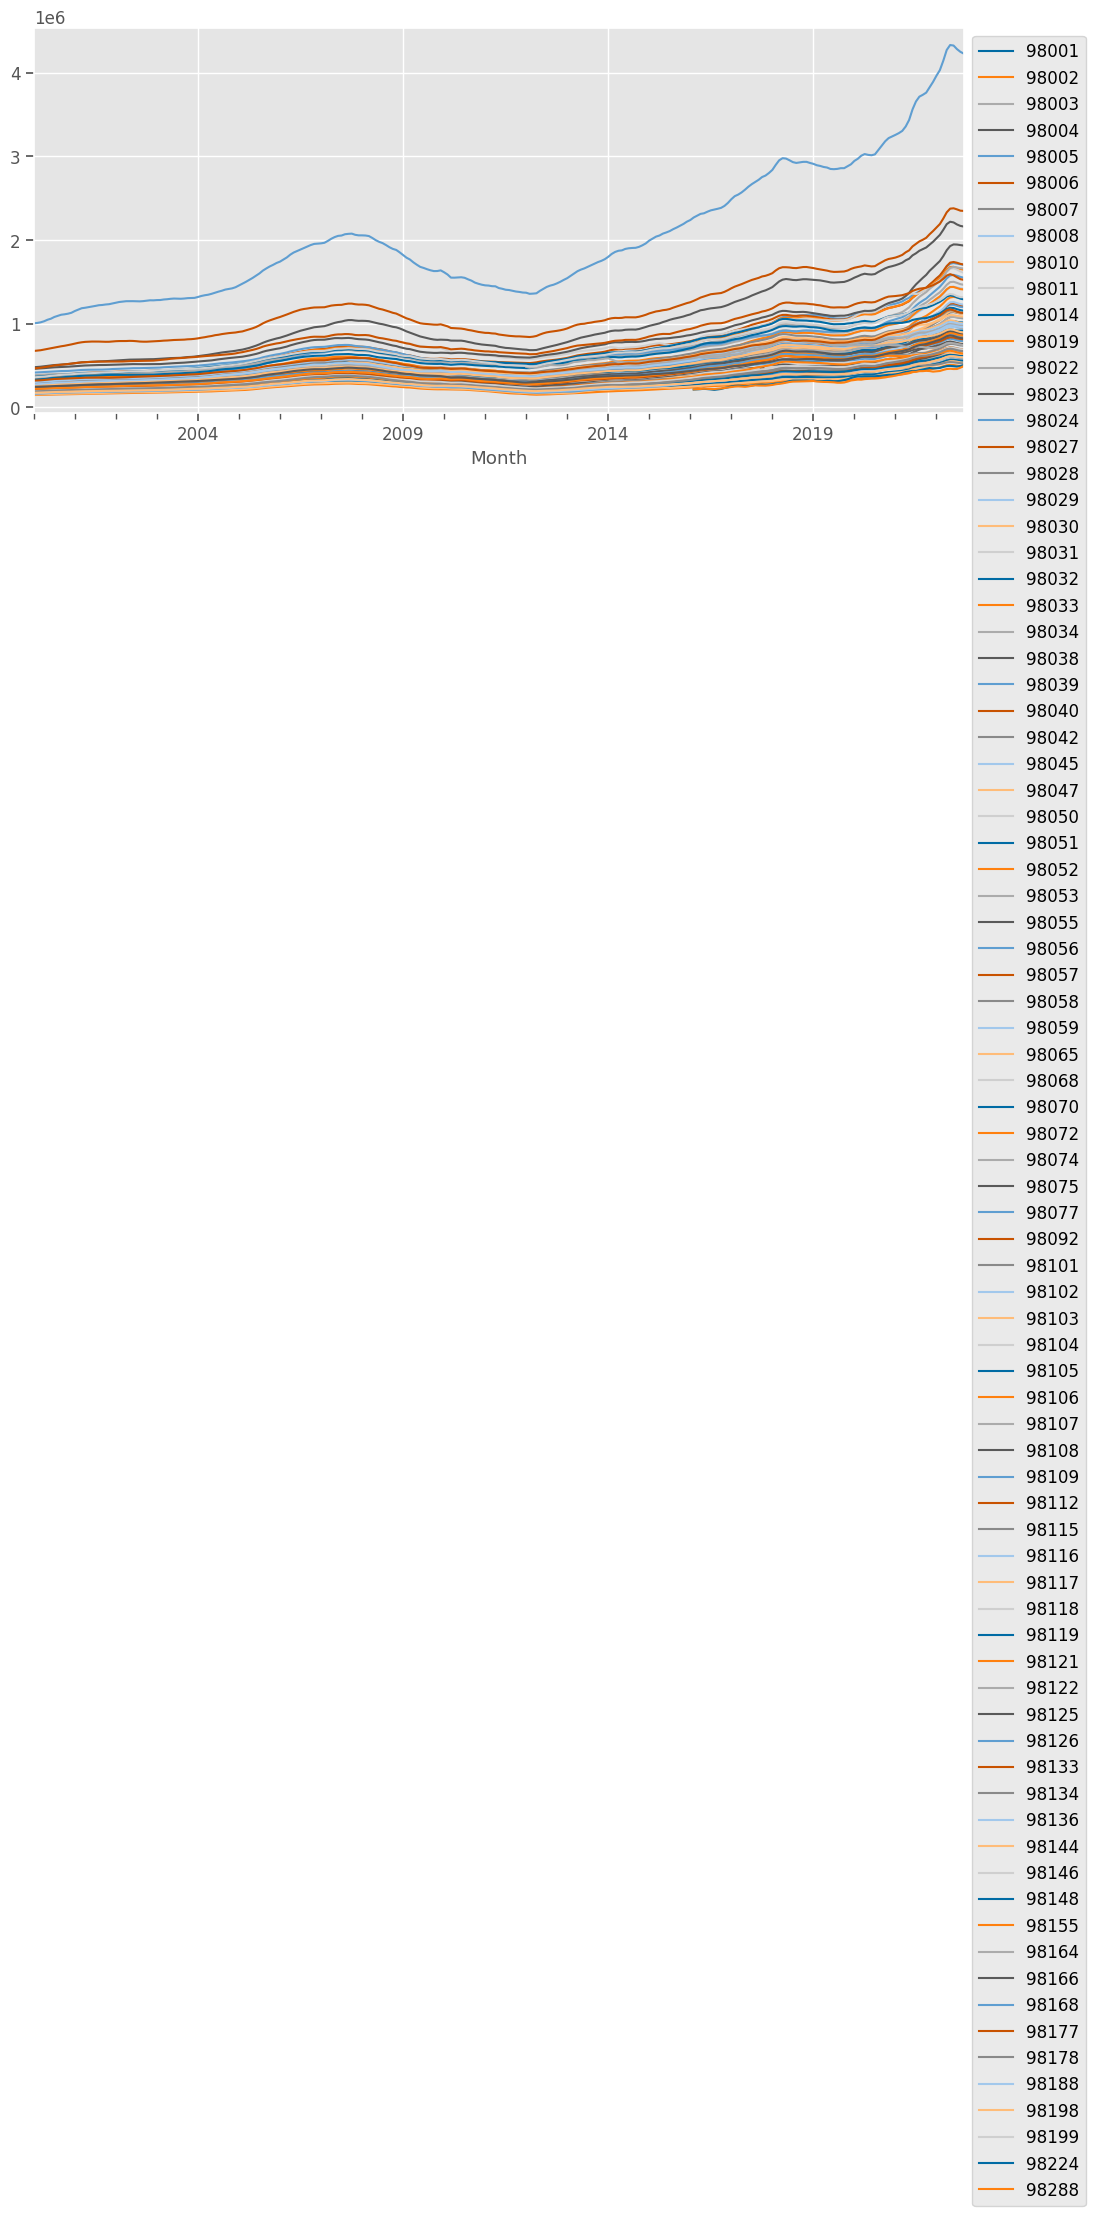

In [145]:
ax = plot_ts.plot(figsize=(12,5))
ax.legend(bbox_to_anchor=[1,1])

In [142]:
plot_kws ={'style':'.-'}
# ax = king_ts.loc[df_ts.index.min():df_ts.index.max()].plot(**plot_kws)

# df_ts.resample('M').mean()['price'].plot(ax=ax, **plot_kws)
# ax.legend()

In [ ]:
# king_ts = melted.groupby('CountyName', as_index=False).resample("M")['Home Value'].mean()#numeric_only=True)
# king_ts
# king_ts.plot();